<a href="https://colab.research.google.com/github/MinaMelek/Arabic-socialMedia-evaluation/blob/main/pipeline_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KSA Facebook pages Sentiment analysis



**Notes on the data:**


*   There are a 8911 dublicated samples in the text corpuses, so they were deleted.
[cell link](https://colab.research.google.com/drive/1-Mmv_xIzgg1PhDbu4lGPVrMOfI8zZUpw?authuser=1#scrollTo=AE1DyLU24c3_&line=2&uniqifier=1)
*   The arabic stemming library is leaky, a hard coded stemming was developed for Egyptian dialect, so a modification for KSA might be required.
*   More data investigation is required, to determine the special cases of KSA accent.
*   Topic investigation is required before advancing more in the code.
*   Number of files that contain KSA data is 19, the number of samples per file are in [this cell](https://colab.research.google.com/drive/1-Mmv_xIzgg1PhDbu4lGPVrMOfI8zZUpw?authuser=1#scrollTo=MPn66Q0Y4skv&line=1&uniqifier=1).



**Samples from the data**


*   **Positive feedback** -> 'ÿØ. ÿßŸÑŸáÿßŸÖ ŸÖŸÜ ÿßŸÅÿ∂ŸÑ ÿßŸÑÿßÿ∑ÿ®ÿßÿ° ÿπŸÑŸÖÿß Ÿà ÿÆŸÑŸÇÿß'
*   **Negative feedback** -> ŸàÿßŸÑŸÑŸá ÿßŸÑŸàÿßÿ≠ÿØ ŸäÿÆÿßŸÅ ŸäÿÆÿ≥ÿ± ŸÅŸÑŸàÿ≥ ŸàŸÖÿßŸäÿ≥ÿ™ŸÅŸäÿØ ŸÑÿßŸÜŸä ÿ¨ÿ±ÿ®ÿ™ ÿßŸÑÿ£ÿ¨Ÿáÿ≤Ÿá ŸàŸÖÿßÿßÿ≥ÿ™ŸÅÿØÿ™  ÿÆÿ≥ÿ±ÿ™ ŸÖÿ®ÿßŸÑÿ∫   Ÿàÿßÿµÿ®ÿ™ ÿ®ÿßŸÑÿßÿ≠ÿ®ÿßÿ∑ ÿÆÿ≥ÿßÿ±Ÿá ŸàŸÇÿ™ ŸàŸÖÿ®ÿßŸÑÿ∫   Ÿàÿ¢ÿÆÿ±  ÿ¥Ÿä ÿßÿ≠ÿ®ÿßÿ∑ ÿßÿ∞ÿß ÿ™ÿ∂ŸÖŸÜŸà ÿßŸÉŸäÿØ ÿ¨Ÿáÿßÿ≤ ÿßŸÜŸÉŸäÿ±ŸÅ Ÿäÿ≥ÿßÿπÿØ ÿπŸÑŸâ ŸÜÿ≠ÿ™ ÿßÿ≠ŸÜÿß ŸÖÿ¨ŸÖŸàÿπŸá  ŸÜÿ¨Ÿä ŸàŸÜÿ¨ÿ±ÿ® ÿ¥Ÿä ÿßŸÉŸäÿØ'
*   **Price inquiry**     -> 'ŸÉŸÖ ÿ≤ÿ±ÿßÿπÿ© ÿßŸÑÿßÿ≥ŸÜÿßŸÜ ŸÉÿßŸÖŸÑ ŸÑŸàÿ≥ÿ≠ÿ™Ÿà ÿ±ÿ¨ÿπŸàŸÑŸä ÿÆÿ®ÿ±'
*   **Place inquiry**     -> 'ÿ£ŸäŸÜ ÿßŸÑŸÖŸÉÿßŸÜ ÿ®ÿßŸÑÿ∂ÿ®ÿ∑'
*   **Date-Time inquiry**     -> 'ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ ÿπÿßŸàÿ≤ ÿßÿ≠ÿ¨ÿ≤ ŸàÿßÿÆÿØ ŸÖŸäÿπÿßÿØ ŸÅŸä ÿßŸÑÿπŸäÿßÿØÿ©'
*   **service inquiry**     -> 'ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ŸÖ ŸáŸÑ ŸäŸàÿ¨ÿØ ÿπÿ±Ÿàÿ∂ ŸÑŸÑŸÉÿ¥ŸÅ ÿßŸÑŸÖÿ®ŸÉÿ± ŸàÿßŸÑŸÖÿßŸÖŸàÿ¨ÿ±ÿßŸÖ ŸàŸÉŸÖ ÿ≥ÿπÿ±Ÿá'
*   **Mention** -> 'ÿßÿ≠ŸÖÿØ ÿßÿ≥ŸÖÿßÿπŸäŸÑ'
*   **Consultation** -> 'ÿßŸÜÿß ÿßŸÑŸÇŸàŸÑŸàŸÜ ÿ™ÿßÿπÿ®Ÿä ÿ¨ÿØÿß ŸàŸÉÿ¥ŸÅÿ™ ŸÇŸÑŸä ÿπŸÜÿØŸÉ ŸÖŸÉÿ±Ÿàÿ®'
*   **Medical Advice** -> 'ÿßŸÑÿ¥ŸÅÿßÿ° ŸÖŸÜ ÿ£ŸÖÿ±ÿßÿ∂ ÿßŸÑÿ®ÿ±ÿØ ŸàÿßŸÑÿßŸÜŸÅŸÑŸàŸÜÿ≤ÿß ŸàŸäŸÇŸàŸä ÿßŸÑŸÖŸÜÿßÿπÿ© ŸÅŸä ÿßŸÑÿ¨ÿ≥ŸÖ ŸàŸÜÿ∂ÿßÿ±ÿ© ÿßŸÑÿ®ÿ¥ÿ±ÿ© Ÿàÿ≠ŸÖÿßŸäÿ© ÿßŸÑÿ¨ŸÑÿØ'
*   **Career** -> 'ÿßŸÑÿ≥ŸÑÿßŸÖ ÿπŸÑŸäŸÉŸÖ ŸáŸÑ ŸäŸàÿ¨ÿØ Ÿàÿ∏ŸäŸÅŸäŸá ÿ¥ÿßÿ∫ÿ±Ÿá ŸÑÿßÿÆÿµÿßÿ¶Ÿä ÿßÿ≥ŸÜÿßŸÜ Ÿà ÿ≤Ÿàÿ¨ÿ™Ÿá ÿßÿÆÿµÿßÿ¶ŸäŸá ÿ∑ÿ® ÿßŸÖÿ±ÿßÿ∂ ÿ≥ÿ±Ÿäÿ±ŸäŸá'

*   **Links** -> 'https://www.facebook.com/Dukkany-%D8%AF%D9%83%D8%A7%D9%86%D9%8A-189932068475721/'
*   **Blesses** -> 'ÿßŸÑŸÑŸáŸÖ  ÿ£ÿ¥ŸÅŸäŸÜŸä Ÿàÿ£ÿ±ÿ≤ŸÇŸÜŸä Ÿàÿ£ÿµÿ±ŸÅ ÿπŸÜŸä ŸàÿßŸÑŸÖÿ§ŸÖŸÜŸäŸÜ ÿ£ÿ¨ŸÖÿπŸäŸÜ ÿ¥ÿ± ÿßŸÑÿ£ŸÖÿ±ÿßÿ∂ Ÿäÿßÿ±ÿ® ÿßŸÑÿπÿßŸÑŸÖŸäŸÜ ŸàÿµŸÑ ÿßŸÑŸÑŸá ÿπŸÑŸä ÿßŸÑÿ≠ÿ®Ÿäÿ® ŸÖÿ≠ŸÖÿØ ŸàÿπŸÑŸä ÿ£ŸÑŸá Ÿàÿ£ÿµÿ≠ÿßÿ®Ÿá ÿ£ÿ¨ŸÖÿπŸäŸÜ ÿπÿØÿØÿÆŸÑŸÇŸá Ÿàÿ±ÿ∂ÿßŸÜŸÅÿ≥Ÿá Ÿàÿ≤ŸÜÿ©ÿπÿ±ÿ¥Ÿá ŸàŸÖÿØÿßÿØŸÉŸÑŸÖÿßÿ™Ÿá ÿ£ÿ®ÿØÿßŸÑÿ£ÿ®ÿØŸäŸÜ ŸàÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá ÿ±ÿ® ÿßŸÑÿπÿßŸÑŸÖŸäŸÜ ÿØÿßÿ¶ŸÖÿ¢ Ÿàÿ£ÿ®ÿØÿ¢'
*   mixed -> 'ÿßŸÑÿ≥ŸÑÿßŸÖ ÿπŸÑŸäŸÉŸÖ 
ÿπŸÖŸÑŸäÿ© ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÖÿ≥ÿßÿ± ÿ®ÿßŸÑŸÖŸÜÿ∏ÿßÿ± ŸáŸÑ ŸÖÿ™ŸàŸÅÿ±ÿ© ÿ®ÿßŸÑŸÖÿ¥ŸÅŸâ ÿü
ŸàŸÉŸÖ ÿ™ŸÉŸÑŸÅÿ™Ÿáÿß ÿüÿü'
*   other -> 'ÿßŸÜÿß ÿ®ŸÅÿ∑ÿ± ŸÖÿπ ÿßŸáŸÑ ÿ¨Ÿàÿ≤Ÿâ ÿ∑ŸàŸÑ ÿ±ŸÖÿ∂ÿßŸÜ'
*   **conversation wth BALA7A** -> 'ŸÅÿπŸÑÿßŸã ŸäÿßÿπŸÖ ÿ®ŸÑÿ≠ ÿ±ÿ®ŸÜÿß ŸäÿØŸäŸÉ ÿßŸÑÿµÿ≠ÿ© ŸàÿßŸÑÿπÿßŸÅŸäÿ© üòò'
(11570 samples ~ 40% of data)

**Notes:**

1.   Found feedbacks for both ***services*** and ***prices***
2.   The data file titled "3m.bal7 Page comments with post_id_col.xlsx" mostly contains objective conversations and it takes about 40% of all the data.
3.   Some of the samples contain data from Egypt pages
4.   Any irrelevant data will be deleted at testing, whether it was unrelated to the medical service or it was from Egypt's pages.

---


**Language Detection # samples**


1.   **Arabic:**       3831
2.   **English:**      445
3.   **other:**        164 (mainly *Mentions and franco-arab*)









In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')#, force_remount=True)
curDir ='/content/gdrive/My Drive/Colab Notebooks/Andalusia/Sentiment_KSA'
os.chdir(curDir)
!cat "{curDir}"
!pwd
!ls

Mounted at /content/gdrive
cat: '/content/gdrive/My Drive/Colab Notebooks/Andalusia/Sentiment_KSA': Is a directory
/content/gdrive/.shortcut-targets-by-id/1TalpU3R9NJvBcFbmrx8aDBjC3JAS8Srl/Andalusia/Sentiment_KSA
created_data		    main.ipynb		    original_data
DL_TfIdf.ipynb		    main_w2v_hamdany.ipynb  __pycache__
Embedding_own_train.ipynb   main_w2v.ipynb	    requirements.txt
Embedding_pretrained.ipynb  models		    utilities.py
log			    Negative_reason.png     val_log


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')#raise SystemError('GPU device not found')
else: print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# !pip install fasttext
# !pip install pycld3
# !pip install pycountry
# !pip install qalsadi
!pip install tashaphyne
!pip install contractions

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 245kB 5.5MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 112kB 14.0MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.10-cp37-none-any.whl size=113324 sha256=be0e9abb9ee74a8f760c5594935335b3edc42f176c0ce2fa2e097dac8dcaf270
  Stored in directory: /root/.cache/pip/wheels/10/b8/f5/b7c1a50e6efb83544844f165a9b134afe7292585465e29b61d
Successfully built pyarabic
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 327kB 5.5MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 266kB 6.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=85253 sha256=7b9cdcc75eb730461017a8a75a3c3af38fc87a973b04fd6a96e09fdb08ccf88a
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/

In [ ]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          26124        1190       22231           8        2703       24705
Swap:             0           0           0


## Imports

In [ ]:
os.chdir("../Sentiment_task")
from utilities import *
os.chdir(curDir)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import string
import re
from time import time
from tqdm.autonotebook import tqdm
# NLTK
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer # arabic stemming
from nltk.stem import WordNetLemmatizer
# from qalsadi import lemmatizer
# from qalsadi import analex
# Modeling
from gensim.models import ldamodel, KeyedVectors, Word2Vec
import gensim.corpora;
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adamax, Adagrad, Nadam, Ftrl
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.utils.np_utils import to_categorical
# import fasttext
# import cld3
# import contractions


# nltk.download('stopwords')
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
# lem = lemmatizer.Lemmatizer()
st = ISRIStemmer()
%matplotlib inline

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


## Reading Data

In [ ]:
def read_data(path, check_name_start=False):
    data_list = []
    for file in os.listdir(path):
        if (file.startswith('Andalusia') or not check_name_start) and file.endswith('.xlsx'):
            print(file)
            file_data = pd.read_excel(os.path.join(path, file), sheet_name="Sheet1")
            file_data['file_name'] = file
            data_list.append(file_data)
    return pd.concat(data_list, axis=0, ignore_index=True)

In [ ]:
df = read_data('original_data')
print(df.shape)
df.sample(5, random_state=10)

Andalusia Polyclinics Page comments with post_id_col.xlsx
AndalusiaCKW Page comments with post_id_col.xlsx
Health care conferences Page comments with post_id_col.xlsx
AndalusiaGMS Page comments with post_id_col.xlsx
AndalusiaCareers Page comments with post_id_col.xlsx
AndalusiaMedicalTourism Page comments with post_id_col.xlsx
AlsydlyMshBya Page comments with post_id_col.xlsx
AABsaudi Page comments with post_id_col.xlsx
tarakib Page comments with post_id_col.xlsx
DrHassanAbdElsalam Page comments with post_id_col.xlsx
YallaSehaOfficial Page comments with post_id_col.xlsx
FlawlessAlex Page comments with post_id_col.xlsx
startupyourengine Page comments with post_id_col.xlsx
ilearnauc Page comments with post_id_col.xlsx
AndalusiaHospitals Page comments with post_id_col.xlsx
AndalusiaHjH Page comments with post_id_col.xlsx
AndalusiaVD Page comments with post_id_col.xlsx
AndalusiaDC Page comments with post_id_col.xlsx
3m.bal7 Page comments with post_id_col.xlsx
(40710, 6)


created_time  ...                                         file_name
35234  2015-07-16T19:05:29+0000  ...       3m.bal7 Page comments with post_id_col.xlsx
30390  2016-02-18T17:23:04+0000  ...       3m.bal7 Page comments with post_id_col.xlsx
12271  2015-04-19T10:26:43+0000  ...  AndalusiaHjH Page comments with post_id_col.xlsx
29065  2016-06-12T11:36:46+0000  ...       3m.bal7 Page comments with post_id_col.xlsx
19726  2019-10-12T03:48:53+0000  ...   AndalusiaVD Page comments with post_id_col.xlsx

[5 rows x 6 columns]

In [ ]:
df.describe()

created_time  ...                                    file_name
count                      40710  ...                                        40710
unique                     40565  ...                                           19
top     2014-06-20T23:29:45+0000  ...  3m.bal7 Page comments with post_id_col.xlsx
freq                           4  ...                                        13326

[4 rows x 6 columns]

## Preprocessing

In [ ]:
df.drop(columns=['created_time', 'from', 'id', 'post_id'], inplace=True)
df = df[reversed(df.columns)]
print(df.shape)
print(df.message.unique().shape)

(40710, 2)
(31799,)


### I. Clean text

In [ ]:
from time import time
tb = time()
df["cleaned"] = clean_df(df["message"])
print(time()-tb)
df.sample(5, random_state=10)

3.0093019008636475


file_name  ...                                      cleaned
35234       3m.bal7 Page comments with post_id_col.xlsx  ...  ŸàÿßŸÜÿ™ ÿ∑Ÿäÿ® Ÿäÿß ÿπŸÖŸà ÿ®ŸÑÿ≠ ŸäŸÜÿπÿßÿØ ÿπŸÑŸäŸÉ ÿ®ÿßŸÑÿÆŸäÿ± Ÿäÿß ÿ±ÿ®
30390       3m.bal7 Page comments with post_id_col.xlsx  ...                               ÿßŸÑŸÅ ÿ≥ŸÑÿßŸÖÿ© ÿπŸÑŸäŸÉ
12271  AndalusiaHjH Page comments with post_id_col.xlsx  ...                                             
29065       3m.bal7 Page comments with post_id_col.xlsx  ...                             Ÿäÿß ÿ±Ÿäÿ™ ŸäŸÅŸáŸÖŸà ŸÉÿØÿß
19726   AndalusiaVD Page comments with post_id_col.xlsx  ...               ÿµÿ®ÿßÿ≠ ÿßŸÑÿÆŸäÿ± ŸÖŸÖŸÉŸÜ ÿπŸÜŸàÿßŸÜ ÿßŸÑŸÖÿ≥ÿ™ÿ¥ŸÅŸä

[5 rows x 3 columns]

In [ ]:
# remove repeated sentences in a single text # ToDo
def reduce_sent(x):
    while True:
        d = len(x)
        x = re.sub(r'\b([\w\s]+)( \1\b)+', r'\1', x)
        if len(x) == d:
            return x

df["cleaned"] = df["cleaned"].apply(reduce_sent)

In [ ]:
#remove samples with only numbers in the text
df = df[df.cleaned.map(lambda x: not bool(re.match(r'^[\d\s]+$', x)))] 

In [ ]:
# Remove empty strings after cleaning
print(df[df.cleaned.map(len)<3].shape)
df = df[df.cleaned.map(len)>=3]
df = df[df.cleaned.map(lambda x: len(x.split()) >= 2)] # remove single words
df.shape

(1466, 3)


(34612, 3)

### II. Drop Dublicates

In [ ]:
df = df.drop_duplicates("cleaned", ignore_index=True)
df.sample(5, random_state=10)

file_name  ...                                                          cleaned
27050                  3m.bal7 Page comments with post_id_col.xlsx  ...                  ÿπŸÜÿØŸá ÿ∑ÿπŸÖŸäŸá Ÿäÿß ÿ®ŸÑŸàÿ≠ÿ™Ÿä ÿßÿµŸÑŸä ÿ®ŸÖŸàÿ™ ŸÅŸäŸáÿß ÿßÿ™ŸÑŸä ÿ®50ŸÇÿ±ÿ¥
3132   AndalusiaMedicalTourism Page comments with post_id_col.xlsx  ...                 ÿ®ŸÅÿ∂ŸÑ ÿßŸÑŸÑŸá ÿßŸàŸÑÿß ÿßÿ∞ÿß ÿßÿ±ÿßÿØ ÿßŸÜ ŸäŸÇŸàŸÑ ŸÑÿß ÿ¥Ÿäÿ¶ ŸÉŸàŸÜ ŸÅŸäŸÉŸàŸÜ
27487                  3m.bal7 Page comments with post_id_col.xlsx  ...                                   ÿπŸÖ ÿ®ŸÑÿ≠ ÿ≠ÿ®Ÿäÿ®Ÿä Ÿà ÿßŸÑŸÑÿ© ŸÅŸäŸÜŸÉ Ÿäÿß ÿπŸÖ
26317                  3m.bal7 Page comments with post_id_col.xlsx  ...                                              Ÿäÿ≥ŸÑŸÖ ŸÅŸàŸÖŸÉ Ÿäÿß ÿ≠ÿ¨ ÿ®ŸÑÿ≠
27207                  3m.bal7 Page comments with post_id_col.xlsx  ...  ÿπŸÖÿ±Ÿä ŸÖÿß ÿßÿπÿ™ŸÇÿØÿ™ ŸÅ ÿ≠ÿßÿ¨ÿßÿ™ ÿØŸä Ÿäÿß ÿπŸÖŸà ÿ®ŸÑÿ≠ ŸÑÿßŸÜŸáÿß ÿ¥ÿ±ŸÉ ÿ®ŸäŸÜ ÿ®ÿßŸÑŸÑŸá ÿπÿ≤ Ÿàÿ¨ŸÑ

[5 rows x 3 columns]

**Drop Null**

In [ ]:
# Check null values.
for col in df.columns:
    print(col, df[col].isnull().sum())

file_name 0
message 0
cleaned 0


In [ ]:
df.dropna(inplace=True)
df.shape

(29301, 3)

In [ ]:
df.file_name.value_counts()

3m.bal7 Page comments with post_id_col.xlsx                    11293
AndalusiaDC Page comments with post_id_col.xlsx                 5194
AndalusiaHjH Page comments with post_id_col.xlsx                4285
AndalusiaVD Page comments with post_id_col.xlsx                 3609
AndalusiaMedicalTourism Page comments with post_id_col.xlsx     1453
AndalusiaCKW Page comments with post_id_col.xlsx                 667
AndalusiaCareers Page comments with post_id_col.xlsx             598
YallaSehaOfficial Page comments with post_id_col.xlsx            471
Andalusia Polyclinics Page comments with post_id_col.xlsx        471
AlsydlyMshBya Page comments with post_id_col.xlsx                440
Health care conferences Page comments with post_id_col.xlsx      270
AndalusiaHospitals Page comments with post_id_col.xlsx           216
ilearnauc Page comments with post_id_col.xlsx                    113
DrHassanAbdElsalam Page comments with post_id_col.xlsx            98
FlawlessAlex Page comments with po

#### Save / restore dataframe

In [ ]:
data_path=os.path.join(curDir,'created_data')
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [ ]:
df.to_csv("created_data/data_colab.csv", index=True)

In [ ]:
df = pd.read_csv("created_data/data_colab.csv", index_col="Unnamed: 0")

### III. Drop irrelevant

**Remove Egypt related**

In [ ]:
df_eg = read_data('../Sentiment_task/data', check_name_start=True).drop(columns=['created_time', 'from', 'id', 'post_id', 'file_name']).drop_duplicates()
print(df_eg.shape)
eg = df.message.astype(str).apply(lambda x: x not in df_eg.message.astype(str).to_list())
eg.value_counts()

AndalusiaHospitals Page comments with post_id_col.xlsx
AndalusiaEgypt Page comments with post_id_col.xlsx
(4441, 1)


True     28969
False      332
Name: message, dtype: int64

In [ ]:
df = df[eg]
df.shape

(28969, 3)

In [ ]:
df_ksa = df.copy()
df_ksa["eg"] = 0
for idx in df_ksa.index:
    sentence = str(df_ksa.cleaned[idx]).split()
    if any(e in sentence for e in ['ÿßŸÑÿ¥ŸÑÿßŸÑÿßÿ™', 'ÿ≥ŸÖŸàÿ≠ÿ©', 'ÿßŸÑÿßÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©' ,'ÿßÿ≥ŸÉŸÜÿØÿ±Ÿäÿ©', 'ÿßŸÑŸÖÿπÿßÿØŸä', 'ÿßŸÑŸÇÿßŸáÿ±ÿ©']): df_ksa.eg[idx] = 1
df_ksa.eg.sum()

74

In [ ]:
df_ksa = df_ksa[df_ksa.eg==0].drop(columns=['eg'])
df_ksa.shape

(28895, 3)

**Remove irrelevant files**

In [ ]:
# for i, f in enumerate(df_ksa.file_name.unique()):
#     print(i, f)

""" 
Note: 
 "8- DrHassanAbdElsalam Page comments with post_id_col.xlsx" 
 "6- AlsydlyMshBya Page comments with post_id_col.xlsx" (irrelevant)
 "3- AndalusiaGMS Page comments with post_id_col.xlsx"
 are EGYPT related
 """

' \nNote: \n "8- DrHassanAbdElsalam Page comments with post_id_col.xlsx" \n "6- AlsydlyMshBya Page comments with post_id_col.xlsx" (irrelevant)\n "3- AndalusiaGMS Page comments with post_id_col.xlsx"\n are EGYPT related\n '

In [ ]:
dropped = df_ksa.file_name.unique()[np.r_[16, 4, 2, 9:13, 8, 6, 3]]
dropped

array(['3m.bal7 Page comments with post_id_col.xlsx',
       'AndalusiaCareers Page comments with post_id_col.xlsx',
       'Health care conferences Page comments with post_id_col.xlsx',
       'YallaSehaOfficial Page comments with post_id_col.xlsx',
       'FlawlessAlex Page comments with post_id_col.xlsx',
       'startupyourengine Page comments with post_id_col.xlsx',
       'ilearnauc Page comments with post_id_col.xlsx',
       'DrHassanAbdElsalam Page comments with post_id_col.xlsx',
       'AlsydlyMshBya Page comments with post_id_col.xlsx',
       'AndalusiaGMS Page comments with post_id_col.xlsx'], dtype=object)

In [ ]:
# df_ksa['relivant'] = df_ksa.file_name.apply(lambda x: x not in dropped)
# df_ksa.relivant.value_counts()

True     15556
False    13339
Name: relivant, dtype: int64

In [ ]:
# df_ksa.to_csv("../tmp_data_ksa.csv")

In [ ]:
# dropped = df_ksa.file_name.unique()[np.r_[16, 4, 2, 9:13, 8, 6, 3]]
df_ksa = df_ksa.drop(index=df_ksa.query("file_name in @dropped").index)
# df_ksa = df_ksa[df_ksa.relivant].drop('relivant', axis=1)
df_ksa.shape

(15556, 3)

In [ ]:
df_ksa.sample(5, random_state=10)

file_name  ...                                                                                              cleaned
9389               AndalusiaVD Page comments with post_id_col.xlsx  ...                                                                                        Mohamed Fares
6073              AndalusiaHjH Page comments with post_id_col.xlsx  ...                                                                                        Esraa Basyony
4996              AndalusiaHjH Page comments with post_id_col.xlsx  ...                                                                                        Mahmoud Allam
15718              AndalusiaDC Page comments with post_id_col.xlsx  ...                                                                                        ÿ¥ŸÉÿ±ÿß ÿπŸÑŸä ÿßŸÑÿ±ÿØ
3414   AndalusiaMedicalTourism Page comments with post_id_col.xlsx  ...  ÿßÿπÿßŸÜŸä ŸÖŸÜ ŸÅŸäÿ±Ÿàÿ≥ ŸÉÿ®ÿØ B ŸàŸÇÿØÿßÿ≥ÿ™ÿÆÿØŸÖÿ™ ÿπŸÑÿßÿ¨ Ÿäÿ≥ŸÖŸä ŸÑÿßŸÖŸÅŸäÿ± ŸÑŸÖÿØÿ© ÿ≥ŸÜÿ™ŸäŸÜ ŸàÿßŸäÿ∂ÿß ÿπÿ≥ŸÑ ŸàŸÑÿß Ÿäÿ≤ÿßŸÑ ŸÅŸäÿ±Ÿàÿ≥ ŸÖŸàÿ¨ŸàÿØ ŸÅÿ®ŸÖÿß ...

[5 rows x 3 columns]

In [ ]:
df_ksa.groupby('file_name').count().iloc[:, 1:2]

cleaned
file_name                                                           
AABsaudi Page comments with post_id_col.xlsx                      12
Andalusia Polyclinics Page comments with post_id_col.xlsx        464
AndalusiaCKW Page comments with post_id_col.xlsx                 660
AndalusiaDC Page comments with post_id_col.xlsx                 5192
AndalusiaHjH Page comments with post_id_col.xlsx                4262
AndalusiaMedicalTourism Page comments with post_id_col.xlsx     1436
AndalusiaVD Page comments with post_id_col.xlsx                 3530

### IV. Detect languages

**1. Using FastText**

In [ ]:
pretrained_model = os.path.join('../Sentiment_task', 'data', "lid.176.bin")
model = fasttext.FastText.load_model(pretrained_model)
langs = []
for sent in df_ksa['cleaned']:
    lang = model.predict(re.sub("\n", ' ', str(sent)))[0]
    langs.append(str(lang)[11:13])

df_ksa['langs1'] = langs
df_ksa.sample(5, random_state=10)

file_name  ... langs1
9389               AndalusiaVD Page comments with post_id_col.xlsx  ...     fr
6073              AndalusiaHjH Page comments with post_id_col.xlsx  ...     tr
4996              AndalusiaHjH Page comments with post_id_col.xlsx  ...     en
15718              AndalusiaDC Page comments with post_id_col.xlsx  ...     ar
3414   AndalusiaMedicalTourism Page comments with post_id_col.xlsx  ...     ar

[5 rows x 6 columns]

In [ ]:
lang_counts = df_ksa["langs1"].value_counts()
print(lang_counts.to_dict())
print("# of languages =", lang_counts.size)

{'ar': 12986, 'en': 1597, 'fa': 241, 'fr': 129, 'de': 105, 'es': 49, 'ur': 41, 'id': 41, 'ps': 28, 'nl': 26, 'it': 25, 'pl': 25, 'sd': 19, 'pt': 17, 'ms': 16, 'fi': 14, 'sw': 13, 'az': 12, 'sv': 11, 'et': 10, 'ja': 10, 'da': 9, 'tr': 9, 'ca': 9, 'hu': 7, 'cs': 7, 'no': 6, 'bn': 6, 'eu': 6, 'tl': 5, 'eo': 5, 'sl': 5, 'af': 5, 'ck': 5, 'ku': 4, 'pn': 4, 'vi': 4, 'zh': 4, 'lb': 3, 'ru': 3, 'wa': 2, 'uz': 2, 'mk': 2, 'ko': 2, 'su': 2, 'ce': 2, 'ro': 2, 'hr': 2, 'fy': 1, 'mz': 1, 'as': 1, 'sq': 1, 'ml': 1, 'tg': 1, 'kn': 1, 'al': 1, 'ia': 1, 'la': 1, 'ta': 1, 'mt': 1, 'lt': 1, 'cy': 1, 'nd': 1, 'km': 1, 'jb': 1, 'sh': 1, 'oc': 1}
# of languages = 67


In [ ]:
# df_ksa.query("langs1=='ug'") #sw, cy, fy -> franco

In [ ]:
from pycountry import languages

In [ ]:
langs_defs = []
for l in lang_counts.index:
    try:
        lang_name = languages.get(alpha_2=l).name
        langs_defs.append(l+': '+lang_name)
    except:
        print(l+': Doesn\'t Exist')
        langs_defs.append(l+': Doesn\'t Exist')
print(langs_defs)
print(sorted(langs_defs))

ck: Doesn't Exist
pn: Doesn't Exist
al: Doesn't Exist
jb: Doesn't Exist
mz: Doesn't Exist
['ar: Arabic', 'en: English', 'fa: Persian', 'fr: French', 'de: German', 'es: Spanish', 'id: Indonesian', 'ur: Urdu', 'nl: Dutch', 'it: Italian', 'pl: Polish', 'ps: Pushto', 'pt: Portuguese', 'ms: Malay (macrolanguage)', 'fi: Finnish', 'sv: Swedish', 'sw: Swahili (macrolanguage)', 'ja: Japanese', 'az: Azerbaijani', 'sd: Sindhi', 'ca: Catalan', 'et: Estonian', 'bn: Bengali', 'tr: Turkish', 'da: Danish', 'cs: Czech', 'hu: Hungarian', 'zh: Chinese', 'sl: Slovenian', 'eu: Basque', 'eo: Esperanto', 'vi: Vietnamese', 'no: Norwegian', 'ro: Romanian', 'tl: Tagalog', 'af: Afrikaans', "ck: Doesn't Exist", "pn: Doesn't Exist", 'ku: Kurdish', 'lb: Luxembourgish', 'ru: Russian', 'ko: Korean', 'uz: Uzbek', 'la: Latin', 'su: Sundanese', 'wa: Walloon', 'ce: Chechen', 'hr: Croatian', 'mk: Macedonian', 'cy: Welsh', 'ia: Interlingua (International Auxiliary Language Association)', 'el: Modern Greek (1453-)', 'tg: Ta

**2. Using gcld3**

In [ ]:
# detector = cld3.NNetLanguageIdentifier(min_num_bytes=0, 
#                                         max_num_bytes=1000)


LanguagePrediction(language='ar', probability=0.9999427795410156, is_reliable=True, proportion=1.0)

In [ ]:
langs2 = []
for sent in df_ksa['message']:
    lang = cld3.get_language(text=str(sent), min_bytes=0, max_bytes=1000)
    langs2.append(str(lang.language))

df_ksa['langs2'] = langs2
df_ksa.sample(5, random_state=10)

file_name  ... langs1
9389               AndalusiaVD Page comments with post_id_col.xlsx  ...     fr
6073              AndalusiaHjH Page comments with post_id_col.xlsx  ...     tr
4996              AndalusiaHjH Page comments with post_id_col.xlsx  ...     en
15718              AndalusiaDC Page comments with post_id_col.xlsx  ...     ar
3414   AndalusiaMedicalTourism Page comments with post_id_col.xlsx  ...     ar

[5 rows x 6 columns]

In [ ]:
lang_counts2 = df_ksa["langs2"].value_counts()
print(lang_counts2.to_dict())
print("# of languages =", lang_counts2.size)


{'ar': 12114, 'sd': 461, 'en': 366, 'fa': 306, 'ps': 171, 'no': 120, 'hi-Latn': 118, 'so': 114, 'mg': 95, 'cy': 85, 'ur': 84, 'ms': 73, 'sv': 57, 'et': 54, 'fi': 52, 'ha': 50, 'id': 47, 'sw': 41, 'ga': 41, 'lb': 36, 'da': 34, 'ca': 34, 'hu': 34, 'xh': 32, 'ru-Latn': 32, 'de': 31, 'af': 30, 'uz': 29, 'jv': 27, 'su': 27, 'sn': 26, 'zu': 26, 'fil': 25, 'ig': 25, 'az': 24, 'tr': 23, 'la': 23, 'st': 22, 'hmn': 21, 'ja': 21, 'mt': 20, 'ht': 20, 'ceb': 19, 'es': 19, 'yo': 19, 'sl': 18, 'sr': 18, 'nl': 18, 'fy': 17, 'pl': 17, 'pt': 17, 'haw': 16, 'sm': 16, 'gd': 16, 'eu': 15, 'tg': 15, 'bg': 15, 'lt': 15, 'ny': 14, 'fr': 14, 'bs': 13, 'gl': 11, 'eo': 11, 'el-Latn': 11, 'uk': 10, 'is': 9, 'ku': 9, 'hr': 9, 'ky': 8, 'lv': 8, 'mn': 8, 'it': 8, 'be': 7, 'mi': 7, 'bg-Latn': 5, 'kk': 5, 'ja-Latn': 5, 'cs': 5, 'ru': 5, 'bn': 5, 'zh': 4, 'zh-Latn': 4, 'ko': 3, 'yi': 3, 'ro': 3, 'vi': 3, 'mk': 2, 'sk': 2, 'ta': 2, 'hi': 2}
# of languages = 90


In [ ]:
# df_ksa.query("langs2=='sd'")

**merging the 2 models**

In [ ]:
arabic_langs = ['ar', 'fa', 'az', 'ps', 'ur', 'pn', 'sd', 'ug']
english_langs = ['en']

Langs = []
for idx, row in df_ksa.iterrows():
    if (row.langs1 in arabic_langs) or (row.langs2 in arabic_langs):
        Langs.append('ar')
    elif (row.langs1 in english_langs) or (row.langs2 in english_langs):
        Langs.append('en')
    else:
        Langs.append('other')
df_ksa["langs"] = Langs
print(df_ksa["langs"].value_counts())
df_ksa.drop(["langs1", "langs2"], axis=1, inplace=True)

ar       13369
en        1596
other      591
Name: langs, dtype: int64


In [ ]:
df_ksa.sample(5, random_state=10)

file_name  ...  langs
9389               AndalusiaVD Page comments with post_id_col.xlsx  ...  other
6073              AndalusiaHjH Page comments with post_id_col.xlsx  ...  other
4996              AndalusiaHjH Page comments with post_id_col.xlsx  ...     en
15718              AndalusiaDC Page comments with post_id_col.xlsx  ...     ar
3414   AndalusiaMedicalTourism Page comments with post_id_col.xlsx  ...     ar

[5 rows x 4 columns]

In [ ]:
# Identify links
# df_ksa["link"] = 0
# df_ksa[df_ksa.message.apply(lambda x: bool(re.match("(?P<url>https?://[^\s]+)", str(x))))].link = 1

#### Save / restore dataframe

In [ ]:
df_ksa.to_csv("created_data/KSA_data_colab.csv", index=True)

In [ ]:
df_ksa = pd.read_csv("created_data/KSA_data_colab.csv", index_col="Unnamed: 0")

In [ ]:
df_ksa.sample(5, random_state=10)

file_name  ...  langs
9389               AndalusiaVD Page comments with post_id_col.xlsx  ...  other
6073              AndalusiaHjH Page comments with post_id_col.xlsx  ...  other
4996              AndalusiaHjH Page comments with post_id_col.xlsx  ...     en
15718              AndalusiaDC Page comments with post_id_col.xlsx  ...     ar
3414   AndalusiaMedicalTourism Page comments with post_id_col.xlsx  ...     ar

[5 rows x 4 columns]

## Arabic Data

In [ ]:
# irrelivant test (ignore)
# df_ar = df_ksa[df_ksa.cleaned.apply(lambda x: not bool(re.match('^[A-Za-z0-9\s]+$', x)))]
# df_ar.shape

(25771, 5)

In [ ]:
df_ar = df_ksa#.query("langs=='ar'").drop('langs', axis=1)
messages = df_ar.message#.to_numpy(dtype=str)
df_ar.shape

(15556, 4)

### I. Text processing

#### Old methods (Deprecated)

**Remove elongation**
(Deprecated) 

---
you can find it in utilities.py

In [ ]:
# re.sub(r'(?<=\w)(Ÿâ)(?=(\s|\Z))', 'ÿ¢', 'ŸâŸâŸáŸàŸá Ÿâ ÿπŸÑŸâ ŸÅŸâ ŸÅŸäŸäŸâ ÿπŸÑŸâÿßŸâ')

In [ ]:
# def remove_longation(word):
#     word = re.sub(r'(.)\1+', r'\1\1', word)
#     word = word.replace('ÿßÿß', 'ÿß').replace('ŸàŸà', 'Ÿà').replace('ŸäŸä', 'Ÿä')
#     word = re.sub(r'[^\w\sÿ†-ŸäŸ°-Ÿ©]', '', word)
#     word = re.sub("[ÿ•ÿ£ÿ¢ÿß]", "ÿß", word)
#     word = re.sub("[ÿ†ŸâŸä]", "Ÿä", word)
#     word = re.sub("Ÿäÿ¶", "Ÿäÿ°", word)
#     word = re.sub("[ÿ¶ÿΩÿæÿø]", "ÿ°", word)
#     word = re.sub("ÿ§", "ÿ°", word)
#     word = re.sub("ÿ©", "Ÿá", word)
#     word = re.sub("[ÿºÿª⁄Ø]", "ŸÉ", word)
#     return word

**Stemming**
(Deprecated) 

---
you can find it in utilities.py

In [ ]:
# st = ISRIStemmer()

In [ ]:
# msg_words = df_ar.message.apply(lambda x: " ".join([st.stem(remove_longation(w)) for w in str(x).split()]))
# df_ar["msg_stem"] = msg_words
# print("5 random samples:")
# df_ar.sample(5, random_state=10)

**Remove stopwords**
(Deprecated) 

---
you can find it in utilities.py

In [ ]:
# cachedStopWords = stopwords.words("arabic") + st.stop_words
# [cachedStopWords.remove(e) for e in ['ŸÉŸÖ', 'ŸÉŸÖ', 'ÿ®ŸÉŸÖ', 'ÿ®ŸÉŸÖ', 'ŸÖÿ≥ÿßÿ°', 'ÿßŸÖÿ≥Ÿâ', 'ÿ£ŸÖÿ≥Ÿâ', 'ŸÉÿßŸÜÿ™']]
# # print(cachedStopWords)
# cachedStopWords = sorted(set(remove_longation(" ".join(cachedStopWords)).split(" ") + ['ŸÖŸÜ' , 'Ÿà']))
# cachedStopWords.remove(cachedStopWords[138])
# print(dict(enumerate(cachedStopWords)))
# def remove_stopwords(msg_words, split=False, cachedStopWords=cachedStopWords):
#     for idx in msg_words.index:
        
#         #go through each word in each msg_words row, remove stopwords, and set them on the index.
#         if split:
#             msg_words[idx] = [word for word in msg_words[idx].split() if word not in cachedStopWords];
#         else:
#             msg_words[idx] = " ".join([word for word in msg_words[idx].split() if word not in cachedStopWords]);
        
#         #print logs to monitor output
#         if idx % 1000 == 0:
#             print('\rc = ' + str(idx) + ' / ' + str(len(msg_words)))
#     return msg_words

#### Stemming

In [ ]:
msg_words = stem(df_ar.cleaned.apply(lambda x: re.sub(r'ÿ©\b', 'Ÿá', x)))
df_ar["msg_stem"] = msg_words

#### Limitization

In [ ]:
msg_words = lemma(df_ar.cleaned.apply(lambda x: re.sub(r'ÿ©\b', 'Ÿá', x)))
df_ar["msg_lemmed"] = msg_words
df_ar.sample(5, random_state=20)

file_name  ...                                                                                  msg_lemmed
12226              AndalusiaVD Page comments with post_id_col.xlsx  ...                                                                                  ŸÉŸÖ ÿπŸÖŸÑ ÿ≥Ÿàÿ±
14104              AndalusiaDC Page comments with post_id_col.xlsx  ...                                                                                   ŸäŸá ŸÖÿßŸÅ ÿ±ÿØ
2437   AndalusiaMedicalTourism Page comments with post_id_col.xlsx  ...  ÿπÿß ŸÖŸÜ ÿßŸÖ ŸÖŸÅÿßÿµŸÑ ÿπÿ∏ÿßŸÖ ÿ±ŸÉÿ® ÿßÿ±ÿ™ÿ±Ÿàÿ≤ ÿ±ÿ¨Ÿà ÿßŸÅÿßÿØ ŸÉŸÑ ÿ™ŸÅÿßÿµŸäŸÑ ÿπŸÑÿßÿ¨ ÿßÿ≤ÿßŸÑ ÿßŸÖ ÿßŸÜ ŸÉÿßŸÜ ŸÅŸä ÿØŸàÿßÿ° ÿ¥ŸÉÿ± ÿØŸÖ ŸàŸÅŸäÿßÿ°
9755               AndalusiaVD Page comments with post_id_col.xlsx  ...                 ÿπŸÜÿØ ÿÆÿ¥Ÿà ÿ¥ÿØŸäÿØ ŸÅŸä ÿ±ŸÉÿ® ÿßÿØ ÿπŸÑÿßÿ¨ ÿ™Ÿäÿ± ÿ≠ŸÇ ŸÖÿßÿØ ÿ¨ŸÑÿßÿ™ŸÜ ÿ≠ŸÇ ÿ±ÿ™ÿ≤ŸàŸÜ ŸáŸÑ ÿ≠ŸÇ ÿ±ÿ™ŸàŸÜ ÿ∂ÿßÿ± ÿßŸÑ ÿ±ŸÉÿ®
5745              AndalusiaHjH Page comments with post_id_col.xlsx  ...                                                                 ÿ≥ŸÖ ÿ≠Ÿäÿß ÿ∫ÿ∞ÿßÿ° ÿ±Ÿàÿ≠ ÿ≠ÿ± ŸÖŸÑÿ¶ ÿ≥ÿ±ÿßÿ±

[5 rows x 4 columns]

#### Remove stopwords

In [ ]:
# msg_words = df_ar.msg_stem.apply(lambda x: re.sub(r'\b('+"|".join(cachedStopWords)+r')\W', '', " ".join(x)).split(" "))
msg_words = remove_stopwords(msg_words)
df_ar["msg_stem_stop_words"] = msg_words
print("5 random samples:")
df_ar.sample(5, random_state=10)

5 random samples:


file_name  ...                                          msg_stem_stop_words
15949            AndalusiaDC Page comments with post_id_col.xlsx  ...                                                      ÿ≤ÿ±ÿπ ÿπŸÖŸÑ
8378            AndalusiaHjH Page comments with post_id_col.xlsx  ...                                            ÿ≥ŸÑŸÖ Ÿàÿ¨ÿØ ÿØŸÉÿ™Ÿàÿ± ÿπŸäŸÜ
7000            AndalusiaHjH Page comments with post_id_col.xlsx  ...  ÿ¥Ÿäÿ° ŸÖŸÉŸÜ ŸÇÿØŸÖ ŸÖÿ´ŸÑ ÿÆŸÑÿµ ÿπŸÑŸÖ ÿßŸÑŸÑ ŸÅÿÆÿ± ÿ¨ÿØÿß ŸÉŸàŸÜ ÿßÿ±Ÿä ŸÜÿ∏ÿß ÿ±ÿ¨Ÿà Ÿäÿ™ŸÖ ÿßŸÑŸÑ
279    Andalusia Polyclinics Page comments with post_id_col.xlsx  ...                             ÿßÿ¥ÿ° ÿßŸÑŸÑ ÿ±ÿ®ŸÜ ŸàŸÅŸÇ ÿ±ÿ® ŸÅÿπŸÑ ÿßÿ≠ÿ≥ ÿØŸÉÿ™Ÿàÿ±
471             AndalusiaCKW Page comments with post_id_col.xlsx  ...                                                  ŸÉŸÑŸÖ ÿ¨ŸÖŸÑ ÿ¨ÿØÿß

[5 rows x 6 columns]

**Categorizing data**

In [ ]:
price_msgs = messages[msg_words.apply(lambda x: any(e in x.split() for e in ['ŸÉŸÖ', 'ÿ®ŸÉŸÖ', 'ŸÉŸÑŸÅ', 'ÿ≥ÿπÿ±']))] # removed 'ŸÉÿßŸÖ' for conflict with appointment inquiry
print("# samples might be for Price inquiry", price_msgs.count(), sep='\n')
print("5 random samples:", price_msgs.sample(5, random_state=10), sep='\n')

# samples might be for Price inquiry
2651
5 random samples:
13957      ÿ™ŸÇŸàŸäŸÖ ÿßŸÑÿ£ÿ≥ŸÜÿßŸÜ ŸÖŸÜ ŸÉŸÖ Ÿäÿ®ÿØÿß ŸàŸÉŸÖ ŸäŸÜÿ™ŸáŸä
12641    ÿ≥ÿπÿ± ÿßŸÑŸÉÿ¥ŸÅ ŸÉÿßŸÖ ŸÖŸÜ ŸÅÿ∂ŸÑŸÉŸàÿß Ÿàÿ∑ÿ±ŸäŸÇÿ© ÿßŸÑÿ≠ÿ¨ÿ≤
5526                ÿ®ŸÉŸÖ ÿßŸÑÿ®ÿßŸÇŸá ŸÑŸÖŸÇŸäŸÖ ÿ≥ÿßÿ¶ŸÇ ÿÆÿßÿµ
14736                          ÿ®ŸÉŸÖ ÿ≤ÿ±ÿßÿπŸá ÿßŸÑÿ≥ŸÜ
13970       ÿßŸÜÿß ÿßÿ±ŸäÿØ ÿßŸÜ ŸÜÿ≤ÿ±ÿπ 2 ÿßÿ≥ŸÜÿßŸÜ ŸÉŸÖ ÿßŸÑÿ™ŸÖŸÜ
Name: message, dtype: object


In [ ]:
date_time_msgs = msg_words[msg_words.apply(lambda x: any(e in x.split() for e in ['ŸÖŸàÿßÿπŸäÿØ', 'ŸäÿπÿØ', 'ÿπÿßÿØ']))] # removed 'ŸÉÿßŸÖ' for conflict with appointment inquiry
print("# samples might be for date_time inquiry", date_time_msgs.count(), sep='\n')
print("5 random samples:", date_time_msgs.sample(5, random_state=10), sep='\n')

In [ ]:
date_time_msgs = messages[msg_words.apply(lambda x: any(e in x.split() for e in ['ŸÖŸàÿßÿπŸäÿØ', 'ŸäÿπÿØ', 'ÿπÿßÿØ']))] # removed 'ŸÉÿßŸÖ' for conflict with appointment inquiry
print("# samples might be for date_time inquiry", date_time_msgs.count(), sep='\n')
print("5 random samples:", date_time_msgs.sample(5, random_state=10), sep='\n')

**Merge all Text processing steps**

In [ ]:
def process_ar(message, stemming=True):
    print("stemming and elongation....")
    if stemming:
        msg_words = stem(message)

    else:
        msg_words = lemma(message)
    print("stop words....")
    msg_words = remove_stopwords(msg_words)  
    return msg_words

#### Save / restore dataframe

In [ ]:
df_ar.to_csv("created_data/arabic_colab.csv", index=True)

In [ ]:
df_ar = pd.read_csv("created_data/arabic_colab.csv", index_col="Unnamed: 0")
messages = df_ar.message#.to_numpy(dtype=str)


In [ ]:
df_ar.sample(5, random_state=10)

file_name  ...                                          msg_stem_stop_words
15949            AndalusiaDC Page comments with post_id_col.xlsx  ...                                                   ÿ≤ÿ±ÿπ ÿπŸÖŸÑ ŸàŸÖ
8378            AndalusiaHjH Page comments with post_id_col.xlsx  ...                                             ÿ≥ŸÑŸÖ Ÿàÿ¨ÿØ ÿØŸÉÿ™Ÿàÿ± ÿπŸä
7000            AndalusiaHjH Page comments with post_id_col.xlsx  ...  ŸÇŸÑ ÿ¥Ÿäÿ° ŸÖŸÖ ŸÇÿØŸÖ ŸÖÿ´ŸÑ ÿÆŸÑÿµ ÿπŸÑŸÖ ŸÜŸä ÿÆŸàÿ± ÿ¨ÿØ ŸàŸÜ ÿ±Ÿä ÿ∏ŸÖÿß ŸÖÿß ÿ±ÿ¨Ÿà ÿ™ŸÖ ÿπŸÖÿ™
279    Andalusia Polyclinics Page comments with post_id_col.xlsx  ...                                       ÿßÿ¥ÿ° ÿ±ÿ® ŸàŸÅŸÇ ÿ±ÿ® ÿ≠ÿ≥ ÿØŸÉÿ™Ÿàÿ±
471             AndalusiaCKW Page comments with post_id_col.xlsx  ...                                                   ŸÑÿßŸÖ ÿ¨ŸÖŸÑ ÿ¨ÿØ

[5 rows x 6 columns]

### II. Topic clustering

#### Topic modeling using LDA

In [ ]:
# msg_words = df_ar.cleaned.apply(lambda x: x.split())
msg_words = remove_stopwords(df_ar.cleaned, split=True)

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(msg_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[msg_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[msg_words.iloc[10]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['ÿ≥ÿ§ÿßŸÑŸä', 'ÿ™ŸÅÿ∂ŸÑÿ™ŸÖ', 'Ÿäÿ¥ÿ±ŸÅŸä', 'ÿßÿ™ÿπÿßŸÑÿ¨', 'ÿπŸÜÿØŸÉŸÖ', 'ÿπÿßŸäÿ≤', 'ÿßÿπÿ±ŸÅ', 'ÿ™ÿßŸÖŸäŸÜ_ÿµÿ≠Ÿä', 'ÿ®ÿ™ŸÜÿµÿ≠ŸàŸÜŸä', 'ÿßÿ™ŸÖŸÉŸÜ', 'ÿπŸÑÿßÿ¨', 'ÿπŸÜÿØŸÉŸÖ', 'Ÿàÿ¨ÿ≤ÿßŸÉŸÖ', 'ÿßŸÑŸÑŸá', 'ÿÆŸäÿ±']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
msg_words = make_bigrams(msg_words)
msg_words = make_trigrams(msg_words)
# msg_words = remove_stopwords(msg_words)

In [ ]:
num_topics = 10
id2word = gensim.corpora.Dictionary(msg_words);

corpus = [id2word.doc2bow(text) for text in msg_words];
lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics);


In [ ]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [ ]:
lda.show_topic(1, topn = num_topics)

[('ÿßŸÑŸÑŸá', 0.020413667),
 ('ÿ®ŸÉŸÖ', 0.017436612),
 ('ÿßÿ≥ŸÜÿßŸÜ', 0.013523162),
 ('ÿØŸÉÿ™Ÿàÿ±', 0.013053219),
 ('ÿßŸÉŸäÿØ', 0.01006049),
 ('ÿ¨ÿØÿß', 0.009917551),
 ('ÿπŸÜÿØŸÉŸÖ', 0.008811988),
 ('ŸÖÿß', 0.008604231),
 ('ÿßÿ∑ŸÅÿßŸÑ', 0.00745166),
 ('ÿ¨ŸÖŸäŸÑ', 0.0073825545)]

In [ ]:
get_lda_topics(lda, num_topics)

Topic # 01 Topic # 02 Topic # 03  ...  Topic # 08  Topic # 09  Topic # 10
0        ŸÖŸÖŸÉŸÜ       ÿßŸÑŸÑŸá        ŸÉÿ¥ŸÅ  ...       ÿπŸÜŸàÿßŸÜ        ŸÖÿ±ŸÉÿ≤       ÿßÿ≥ŸÜÿßŸÜ
1         ÿ≥ÿπÿ±        ÿ®ŸÉŸÖ        ŸÉÿßŸÖ  ...        ÿπŸÜÿØŸä           3       ÿ™ÿßŸÖŸäŸÜ
2          ŸÉŸÖ      ÿßÿ≥ŸÜÿßŸÜ       ÿßŸÑŸÑŸá  ...         ÿ≠ÿ¨ÿ≤     ÿßÿ®ÿ™ÿ≥ÿßŸÖÿ©         ŸÉÿßŸÖ
3         ŸÉÿ¥ŸÅ      ÿØŸÉÿ™Ÿàÿ±      ÿØŸÉÿ™Ÿàÿ±  ...        ŸÖŸÖŸÉŸÜ     ÿßŸÜÿØŸÑÿ≥Ÿäÿ©         ŸàŸáŸÑ
4        ÿßÿπÿ±ŸÅ       ÿßŸÉŸäÿØ       ÿ±ÿßÿ¶ÿπ  ...        ÿπŸÑÿßÿ¨       ÿ≥ÿπÿßÿØÿ©       ÿπŸÜÿØŸÉŸÖ
5      ŸÖŸàÿßÿπŸäÿØ        ÿ¨ÿØÿß       ŸÖÿ≠ŸÖÿØ  ...         ÿßŸÑŸÖ        ŸÖÿßŸÅŸä        ÿ≥ŸÖÿ≠ÿ™
6       ÿßÿ≥ÿπÿßÿ±      ÿπŸÜÿØŸÉŸÖ        ÿ¨ÿØÿ©  ...        ÿ≥ŸÖÿ≠ÿ™      ŸÖŸÉÿ±ŸàŸÜŸá        ŸäŸàÿ¨ÿØ
7       ÿßÿ≥ŸÜÿßŸÜ         ŸÖÿß     ÿ™ŸÇÿ±Ÿäÿ®ÿß  ...         ÿ±ŸÇŸÖ        Ÿäÿ¥ŸÖŸÑ       ÿ≤ÿ±ÿßÿπŸá
8        ÿ≥ŸÖÿ≠ÿ™      ÿßÿ∑ŸÅÿßŸÑ         ÿ≥ŸÜ  ...        ÿ®ŸÉÿßŸÖ       ÿ™ÿ±ŸÉŸäÿ®          ŸÖÿß
9           1       ÿ¨ŸÖŸäŸÑ       ÿ®ŸÉÿßŸÖ  ...         ŸÅŸäŸÜ        ÿ¥ŸÉÿ±ÿß          ŸÉŸÖ
10       ÿ®ŸÉÿßŸÖ        ÿ¥ÿßÿ°        ÿ≥ÿπÿ±  ...       ÿØŸÉÿ™Ÿàÿ±      ÿ™ŸÑŸäŸÅŸàŸÜ         ŸÉÿ¥ŸÅ
11        ÿ∂ÿ±ÿ≥         ÿ¥Ÿä       ÿßŸÅÿ∂ŸÑ  ...         ŸÉÿ¥ŸÅ  ŸÅÿ±ÿπ_ŸÖŸÉÿ±ŸàŸÜÿ©         ÿ≠ÿ¨ÿ≤
12      ÿ≤ÿ±ÿßÿπÿ©          ÿØ       Ÿàÿßÿ≠ÿØ  ...          ŸÖÿß        ÿ±Ÿàÿπÿ©         ÿ≥ÿπÿ±
13     ÿ™ŸÅÿßÿµŸäŸÑ          ÿπ         ÿ±ÿ®  ...        ÿßÿ≠ÿ¨ÿ≤        ÿßÿ≠ŸÖÿØ        ÿπŸÜÿØŸä
14       ŸÖŸÉÿßŸÜ     ÿØŸÉÿ™Ÿàÿ±ÿ©       ÿ¨ŸÖŸäÿπ  ...    Ÿàÿ≥ÿπÿ±_ŸÉÿ¥ŸÅ        ÿßÿ±ÿ¨Ÿà         ÿ≠ÿ¥Ÿà
15        ŸàŸÉŸÖ      ÿ≤ÿ±ÿßÿπÿ©        ÿ¨ÿØÿß  ...       ÿ™ŸàÿßÿµŸÑ       ÿßÿ¥ŸÉÿ±ŸÉ        ŸäÿπŸÜŸä
16      ÿØŸÉÿ™Ÿàÿ±       ÿßÿ≠ÿ≥ŸÜ      ÿßÿ∑ÿ®ÿßÿ°  ...  ÿ≥ŸÑÿßŸÖ_ÿπŸÑŸäŸÉŸÖ      ŸÖŸàŸÇÿπŸÉŸÖ         ŸÉÿßŸÜ
17        ÿßŸäÿ¥      ŸÖŸÜÿ∏ÿßÿ±       ŸÉŸÖÿßŸÜ  ...         ÿ≥ŸÉÿ±        ŸÅÿ™ÿ±ÿ©  ÿ≥ŸÑÿßŸÖ_ÿπŸÑŸäŸÉŸÖ
18          2       ÿµŸàÿ±Ÿá      ÿπŸÜŸàÿßŸÜ  ...        ŸÖŸàŸÇÿπ       ÿ™ÿ¨ŸÖŸäŸÑ          ÿ≤Ÿä
19      ÿπŸÜÿØŸÉŸÖ       ŸÖŸÜŸàÿ±    ÿßŸÜÿØŸÑÿ≥ŸäŸá  ...     ÿßÿ®ÿ™ÿ≥ÿßŸÖŸá        ÿ®ÿÆŸäÿ±       ÿ™ŸÑÿ®Ÿäÿ≥

[20 rows x 10 columns]

#### K-means clustering using w2v

In [ ]:
VER = 4
word2vec = KeyedVectors.load_word2vec_format('../Sentiment_task/models/w2v_checkpoints_V'+str(VER)+'/w2v_model.bin', binary=True)
# word2vec = Word2Vec.load('../Sentiment_task/models/w2v_checkpoints/w2v_model_epoch15.gz').wv ## very bad results
# wtv_vect = WordVecVectorizer(word2vec)
num_features = word2vec.vector_size
num_features

300

In [ ]:
# class WordVecVectorizer(object):
#     def __init__(self, word2vec):
#         self.word2vec = word2vec
#         self.dim = word2vec.vector_size

#     def fit(self, X, y):
#         return self    

#     def transform(self, X):
#         return np.array([
#             np.mean([self.word2vec[w] for w in texts.split() if w in self.word2vec]
#                     or [np.zeros(self.dim)], axis=0)
#             for texts in X
#         ])

        
#representing each headline by the mean of word embeddings for the words used in the headlines.

wtv_vect = WordVecVectorizer(word2vec)
X_train_wtv = wtv_vect.transform(df_ksa.cleaned)
print(X_train_wtv.shape)

(15556, 300)


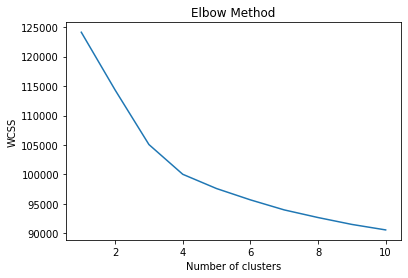

In [ ]:
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
#     kmeans.fit(X_train_wtv)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [ ]:
n_clusters = [3, 4]
for N in n_clusters:
    km = KMeans(
        n_clusters=N, init='k-means++',
        n_init=20, max_iter=500, 
        tol=1e-04, random_state=10,
        copy_x=False, n_jobs=-1
    )
    y_km = km.fit_predict(X_train_wtv)
    df_ksa["n{}_clusters".format(N)] = y_km
# df_clusters = pd.DataFrame({'message' :df_ksa.cleaned, 'topic_cluster' :y_km })

In [ ]:
df_ksa.sample(20, random_state=10).loc[:, ['cleaned', 'n3_clusters', 'n4_clusters']]

cleaned  ...  n4_clusters
9389                                                                                         Mohamed Fares  ...            3
6073                                                                                         Esraa Basyony  ...            3
4996                                                                                         Mahmoud Allam  ...            3
15718                                                                                        ÿ¥ŸÉÿ±ÿß ÿπŸÑŸä ÿßŸÑÿ±ÿØ  ...            2
3414   ÿßÿπÿßŸÜŸä ŸÖŸÜ ŸÅŸäÿ±Ÿàÿ≥ ŸÉÿ®ÿØ B ŸàŸÇÿØÿßÿ≥ÿ™ÿÆÿØŸÖÿ™ ÿπŸÑÿßÿ¨ Ÿäÿ≥ŸÖŸä ŸÑÿßŸÖŸÅŸäÿ± ŸÑŸÖÿØÿ© ÿ≥ŸÜÿ™ŸäŸÜ ŸàÿßŸäÿ∂ÿß ÿπÿ≥ŸÑ ŸàŸÑÿß Ÿäÿ≤ÿßŸÑ ŸÅŸäÿ±Ÿàÿ≥ ŸÖŸàÿ¨ŸàÿØ ŸÅÿ®ŸÖÿß ...  ...            2
11544                                                                    ŸÖŸàÿßÿπŸäÿØŸá ŸÅŸä ŸÅÿ±ÿπ ŸÖÿπÿßÿØŸä ÿßŸÖÿ™Ÿä ŸÑŸà ÿ≥ŸÖÿ≠ÿ™  ...            0
16417                                                                            500 ÿßŸÑŸä 100 ŸÖŸÉÿ≥ŸÖŸÖ ŸÑŸäŸá 200  ...            2
11136                                                                               ŸÉŸÖ ŸÇŸäŸÖÿ© ŸÉÿ¥ŸÅ ŸàÿßŸäŸÜ ÿπŸÜŸàÿßŸÜ  ...            0
8481                                                                              ÿ™ŸÖ ÿßÿ±ÿ≥ÿßŸÑ ÿßÿ¨ÿßÿ®Ÿá ÿßÿ™ŸÖŸÜŸä ŸÅŸàÿ≤  ...            2
10568       ÿπŸÜÿØŸä ÿÆÿ¥ŸàŸÜŸá ÿ¨ÿßŸÖÿØŸá ŸàŸÖŸÜ ÿ≥ŸÜÿ™ŸäŸÜ ÿßÿÆÿ∞ÿ™ ÿ≠ŸÇŸÜÿ™ŸäŸÜ ŸÅŸä ÿ±ŸÉÿ®Ÿá ŸàŸÑÿ≥Ÿá ÿ™ÿπÿ®ÿßŸÜŸá ŸàÿßÿÆÿ∞ÿ™ ÿπŸÑÿßÿ¨ ŸÉÿ™Ÿäÿ± ÿ®ÿØŸàŸÜ ŸÅÿßÿ¶ÿØŸá ÿßÿπŸÖŸÑ ÿßŸäŸá  ...            2
2377   ÿßÿ≥ÿ™ÿ¥ÿßÿ±Ÿá ŸÖŸÜŸÉŸÖ ÿπŸÖŸÑÿ™ ÿπŸÖŸÑŸäŸá ÿßŸàŸÑŸä ŸÅŸä ÿπÿßŸÖ Ÿ®Ÿ¶ ŸàÿπŸÖŸÑÿ™ ÿ´ÿßŸÜŸäŸá ŸÅŸä ÿπÿßŸÖ Ÿ¢Ÿ†Ÿ°Ÿ† ŸÑŸä ÿßÿ≥ÿ™ÿ®ÿØÿßŸÑ ÿµŸÖÿßŸÖ ŸÖÿ™ÿ±ÿßŸÑŸä ŸàÿßŸÑÿßŸÜ ÿßÿ¥ÿπÿ±...  ...            2
10684                                                                  ŸÖŸÖŸÉŸÜ ÿßÿ≠ÿ¨ÿ≤ ŸàŸÖŸäÿπÿßÿØ ŸÉÿ¥ŸÅ ŸàŸÖŸàÿ¨ŸàÿØ ŸäŸàŸÖ ÿßŸäŸá  ...            0
5909                                                                                          ŸÉŸÑŸá ÿ≤Ÿä ÿßŸÅŸÑÿßŸÖ  ...            2
14155                                                                             Omer Abo Yumna Fadwa Ali  ...            3
12413                                                                                            ÿßÿ≠ŸÖÿØ ÿ®ŸÉÿ±Ÿä  ...            1
8455                                                                          ŸÅŸàÿ≤ ÿßŸà ŸÅŸàÿ≤ ÿ®ÿßÿ∞ŸÜ ÿ±ÿ≠ŸÖŸÜ Ÿàÿ™ŸàŸÅŸäŸÇŸá  ...            1
6928                                                          ŸÉŸÖ ÿ≥ÿπÿ± ŸÉÿ¥ŸÅ ÿ¨ŸÑÿ≥Ÿá ŸàŸÉŸÖ ÿ≥ÿπÿ± ÿ¨ŸÑÿ≥Ÿá ŸáŸÑ ŸáŸä ŸÖŸÉŸÑŸÅŸá ÿ¨ÿØÿß  ...            0
12418                                                                                        Gehad Elgayar  ...            3
5322                                                                                            ŸáŸàÿßÿ±Ÿä ÿπÿ±ÿ®Ÿä  ...            2
9720   ÿπŸÜÿØŸä ÿßŸÑŸÖ ŸÅŸä ÿ∞ÿ±ÿßÿπŸä ŸàŸÅŸä ÿ±ŸÉÿ®ÿ© Ÿà ŸÖÿπÿ±ŸÅÿ¥ ÿßŸÖÿ≥ŸÉ ÿßŸä ÿ¥ÿ¶ ÿ®ŸäÿØŸä Ÿà ŸÉŸÖÿßŸÜ ŸÖÿπÿ±ŸÅÿ¥Ÿä ÿßŸÖÿ¥Ÿä ÿ®ÿ±ÿ¨ŸÑŸäÿß Ÿà ŸÖÿß ÿ®ÿ≠ÿ≥ ÿ®ÿ±ŸÉÿ®Ÿä ŸàÿßŸÜÿß...  ...            2

[20 rows x 3 columns]

In [ ]:
df_ksa.head()

file_name  ... cluster
0  Andalusia Polyclinics Page comments with post_id_col.xlsx  ...       0
1  Andalusia Polyclinics Page comments with post_id_col.xlsx  ...       1
2  Andalusia Polyclinics Page comments with post_id_col.xlsx  ...       0
3  Andalusia Polyclinics Page comments with post_id_col.xlsx  ...       0
4  Andalusia Polyclinics Page comments with post_id_col.xlsx  ...       0

[5 rows x 5 columns]

##### Arabic only

In [ ]:
wtv_vect = WordVecVectorizer(word2vec)
X_ar = wtv_vect.transform(df_ar.cleaned)

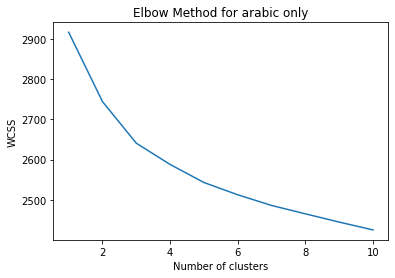

In [ ]:
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=10)
#     kmeans.fit(X_ar)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method for arabic only')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [ ]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=20, max_iter=500, 
    tol=1e-04, random_state=10,
    copy_x=False, n_jobs=-1
)
y_km = km.fit_predict(X_ar)
df_ar["clusters"] = y_km
df_ar.sample(20, random_state=10).loc[:, ['cleaned', 'clusters']]

cleaned  clusters
15949                                                                               ŸáŸä ÿ≤ÿßÿ±ÿπŸá ÿ®ÿ™ÿ™ÿπŸÖŸÑ ŸÅŸä ŸäŸàŸÖ         2
8378                                                                         ÿ≥ŸÑÿßŸÖ ÿπŸÑŸäŸÉŸÖ ŸáŸÑ ŸäŸàÿ¨ÿØ ÿØŸÉÿ™Ÿàÿ± ÿπŸäŸàŸÜ         2
7000   Ÿáÿ∞ÿß ÿßŸÇŸÑ ÿ¥Ÿäÿ° ŸÖŸÖŸÉŸÜ Ÿäÿ™ŸÇÿØŸÖ ŸÑŸÖÿ´ŸÑ Ÿáÿ§ŸÑÿßÿ° ŸÖÿÆŸÑÿµŸäŸÜ ŸäÿπŸÑŸÖ ÿßŸÑŸÑŸá ÿßŸÜŸä ŸÅÿÆŸàÿ± ÿ¨ÿØÿß ÿ®ŸáŸÖ ŸÉŸàŸÜŸä ÿßÿ±Ÿä ŸÜÿ∏ÿßŸÖÿß ŸàÿßŸÖÿßŸÜÿß ÿßÿ±ÿ¨Ÿà ÿß...         2
279                                                           ŸÖÿßÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿ±ÿ®ŸÜÿß ŸäŸàŸÅŸÇŸÉ Ÿäÿß ÿ±ÿ® ŸÅÿπŸÑÿß ÿßÿ≠ÿ≥ŸÜ ÿØŸÉÿ™Ÿàÿ±Ÿá         1
471                                                                                          ŸÉŸÑÿßŸÖ ÿ¨ŸÖŸäŸÑ ÿ¨ÿØÿß         2
12854                                                                                    ŸÖŸàÿ¨ŸàÿØ ÿ≤ÿ±ÿßÿπŸá ÿßÿ≥ŸÜÿßŸÜ         0
17914                                                                                              ŸÇÿ®ŸÑ ÿßÿ≠ŸÑ         2
13111                                                                                       ÿ®ŸÉÿßŸÖ ÿ≥ÿπÿ± ŸÅŸäŸÜŸäÿ±         0
12828                                                                       Mohamed Shamss ÿßÿ¨Ÿáÿ≤ ÿπŸÜÿØŸÉ ÿ∑ÿßŸÑÿπŸá         2
3326                                                            Ÿäÿß ÿ±ÿ® Ÿäÿ¥ŸÅŸä ŸÉŸÑ ŸÖÿ±Ÿäÿ∂ Ÿäÿ™ÿßŸÑŸÖ ÿ®ÿ≠ŸÇ ŸÖÿ≠ŸÖÿØ ŸàÿßŸÑ ŸÖÿ≠ŸÖÿØ         1
17345                                                                             ÿ™ŸÖ ÿßÿ¥ÿ™ÿ±ÿßŸÉ ÿ®ÿßÿ≥ŸÖ modi trix         2
3145                                                                                ŸÑÿ≠ÿØ ŸÑÿßŸÜ ŸÖÿ≠ÿØ ÿ¨ÿßŸàÿ® ÿπŸÑŸäŸÜŸá         2
14013                                                                               ŸÖÿßÿ¥ÿßŸÑŸÑŸá ÿ®ÿßŸäŸÜ ŸÖÿ±ŸÉÿ≤ ÿ±ÿßÿ¶ÿπ         2
8888                                           ŸÖÿ≥ÿ™ÿ¥ŸÅŸä ÿ≠Ÿä ÿ¨ÿßŸÖÿπÿ© ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÜÿØŸÑÿ≥Ÿäÿ© ÿ≠Ÿäÿßÿ© ÿßŸÅÿ∂ŸÑ ŸÉŸÑ ŸäŸàŸÖ ŸÖŸÉÿßÿ±ŸÖ 2 ÿ¥ŸÉÿ±         2
6898                                                                          ŸÖÿßÿπŸÜÿØŸÉŸÖ ŸÅÿ±ÿπ ŸÅŸä ÿ¨ÿßÿ≤ÿßŸÜ ÿßŸà ÿßÿ®Ÿáÿß         2
13120                                                   ÿßÿ±ŸäÿØ ÿπŸÑÿßÿ¨ ÿßŸÑŸÖ ÿ∂ÿ±ÿ≥Ÿä ÿ≠ÿ¥Ÿàÿ© ŸàŸÜÿ≤ÿπ ÿßÿπÿµÿßÿ® ÿ¨ÿØÿ© ÿ¥ÿßÿ±ÿπ ŸÖŸÉÿ±ŸàŸÜÿ©         2
10838  ÿ®ŸÜÿ™Ÿä ÿ´ŸÑÿßÿ´ ÿ≥ŸÜŸàÿßÿ™ ŸÖŸÜ ÿ≥ÿ™ ÿßÿ¥Ÿáÿ± ÿ≠ÿµŸÑŸáÿß ŸÉÿ≥ÿ± ÿßÿ≥ŸÅŸÑ ÿπÿ∏ŸÖŸá ŸÉŸàÿπ ŸàÿπŸÖŸÑÿ™ ÿ™ÿ´ÿ®Ÿäÿ™ ÿßÿ≥ŸÑÿßŸÉ ŸàÿπÿØŸä ŸàŸÇÿ™ ÿ∑ŸàŸäŸÑ ÿ≠ŸÖÿØ ŸÑŸÑŸá ÿ™Ÿäÿ®ÿ≥ ...         2
13585                                                                           ÿ¥ÿßÿ±ÿπ ÿßŸÖŸäÿ± ŸÖÿ≠ŸÖÿØ ÿ®ŸÜ ÿπÿ®ÿØ ÿπÿ≤Ÿäÿ≤         1
17318                                                                                   ÿπÿßŸÅÿßŸÜÿß ÿßŸÑŸÑŸá ŸàÿßŸäÿßŸÉŸÖ         1
11821                                                                                  ŸÉÿßŸÖ ŸÉÿ¥ŸÅ ÿ≠ÿ¨ÿ≤ ŸÇÿ®ŸÑ ŸÉÿ¥ŸÅ         0

### III. Sentiment classification

**Read Datasets**

In [ ]:
os.chdir('../Sentiment_task/')

In [ ]:
def read_train_data(path):
    df1 = pd.read_csv(os.path.join(path, "reviews.tsv"), sep='\t', header=None)
    # df1['rate'] = df1[0]
    df1['text'] = df1[4]
    df1['polarity'] = df1[0].apply(lambda x: 'pos' if x>=4 else 'neg' if x<=2 else 'neutral')# if x<=2 else 'neutral')
    df1 = df1.drop(columns=range(5))

    df2 = pd.DataFrame()
    path = os.path.join(path, 'reviews')
    for f in os.listdir(path):
        df2 = pd.concat([df2, pd.read_csv(os.path.join(path, f))], ignore_index=True)
    df2.drop(columns=['Unnamed: 0', 'restaurant_id', 'user_id'], inplace=True)
    df2['polarity'].replace({1: "pos", 0: "neutral", -1:"neg"}, inplace=True)
    return pd.concat((df1, df2), axis=0)

In [ ]:
df = read_train_data('data')
print(df.polarity.value_counts())
df.sample(5, random_state=10)

pos        75835
neg        17560
neutral    15360
Name: polarity, dtype: int64


text polarity
34199                                                         ÿ¥ŸäŸÇ ŸàŸÑŸÉŸÜ ŸÑÿß ÿßÿπÿ™ŸÇÿØ ÿ®ŸÅŸÉÿ±Ÿá ÿ™ŸÜÿßÿ≥ÿÆ ÿßŸÑÿßÿ±Ÿàÿßÿ≠ ÿßÿ∑ŸÑÿßŸÇÿß  neutral
19966   ŸÉŸÑŸáÿß ÿ±ÿßÿ¶ÿπÿ©. ŸàŸÑŸÉŸÜ ŸÑŸÑŸÜŸáÿßŸäÿ© ŸÉÿßŸÜ ŸàŸÇÿπ ÿßÿÆÿ± . ŸÖÿÆÿ™ŸÑŸÅ ÿ™ŸÖÿßŸÖÿß. ŸÑŸÖ Ÿäÿ§ÿ´ÿ± ÿ¥Ÿäÿ° ŸÇÿ±ÿ£ÿ™Ÿá ŸÅŸä ÿ≠Ÿäÿßÿ™Ÿä ÿπŸÑŸä ŸäŸàŸÖÿß ŸÉŸÖÿß ÿßÿ´ÿ±...      pos
31041  ŸÑŸÑÿ£ÿ≥ŸÅ ŸÑŸÖ Ÿäÿ±ŸÇŸâ ŸÑŸÑÿ∑ŸÖŸàÿ≠ ŸÅŸÉÿßŸÜÿ™ ÿßŸÑÿ®ÿ±ŸÇÿ± ÿ∞ÿßÿ™ ŸÖŸÑŸàÿ≠Ÿá ÿ≤ÿßÿ¶ÿØŸá ŸÅŸä ÿ®ÿ±ŸÇÿ± ÿßŸÑÿØÿ¨ÿßÿ¨ \n ŸàŸÜŸÉŸáÿ© ÿßŸÑŸÅŸÑŸÅŸÑ ÿ≥Ÿäÿ¶Ÿá \n ÿ£ŸÖÿß ÿ®ÿ±ŸÇ...      neg
31457   ÿ±ŸàÿßŸäÿ© ÿ±ÿßÿ¶ÿπÿ© ŸÖŸÜ ÿßŸÉÿ´ÿ± ÿßŸÑÿ¨ŸÖŸÑ ÿßŸÑÿ™Ÿâ ÿßÿ≥ÿ™ŸàŸÇŸÅÿ™ŸÜŸâ ŸÇŸàŸÑŸá " ŸÅŸâ ÿ≠Ÿäÿßÿ© ŸÉŸÑ ÿßŸÖÿ±ÿ¶ ŸÖŸÜÿß ÿÆŸäÿ∑ ÿ±ŸÅŸäÿπ Ÿäÿ±ÿ®ÿ∑Ÿá ÿ®ÿßŸÑÿ≠Ÿäÿßÿ© ŸÖÿß ÿß...      pos
19280                                                                                ÿ®ÿ≠ÿ®Ÿáÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿß:)      pos

**adding twitter data**

In [ ]:
tw = pd.read_csv(os.path.join('data', "twitter.csv"))
# tw['polarity'].replace({'neutral': "neg"}, inplace=True)
samps = tw['polarity'].value_counts(sort=False)
inc = samps['neg']-samps['pos']
print(inc)
samps

885


neg        1684
pos         799
obj        6691
neutral     832
Name: polarity, dtype: int64

**Adding Samples for miss-labeled data**

In [ ]:
# msg = messages[df_ar["msg_stem_stop_words"].apply(lambda x: any(e in str(x).split() for e in ['ŸàŸÅŸÇ']))] # removed 'ŸÉÿßŸÖ' for conflict with appointment inquiry
# print("# samples might be for Price inquiry", msg.count(), sep='\n')
# print("5 random samples:", msg.sample(5, random_state=10), sep='\n')
# msg = msg.sample(frac=0.5).rename('text')
# msg = pd.DataFrame(msg)
# msg["polarity"] = 'pos'
# msg.head()

# samples might be for Price inquiry
207
5 random samples:
1660                                            ÿ±ÿ®ŸÜÿßŸäÿ±ÿ∂ ÿπŸÜŸÉ ŸàŸäŸàŸÅŸÇŸÉ ŸàŸäŸÅÿß ÿØ ŸäŸÉŸä ŸäÿßÿØŸÉÿ™Ÿàÿ±ÿ©\n
1928                                                  ÿØ ŸáÿßŸÜŸä ÿ™ŸàŸÅŸäŸÇ ÿ±ÿ®ŸÜÿß Ÿäÿ≠ŸÅÿ∏ŸÉ ŸàŸäÿ®ÿßÿ±ŸÉ ŸÅŸäŸÉ
874                                                                    ÿ®ÿØÿßŸäÿ© ŸÖŸàŸÅŸÇÿ© Ÿäÿßÿ±ÿ® 
548     ÿØŸÉÿ™Ÿàÿ±Ÿá ŸàÿßŸÜÿ≥ÿßŸÜŸá ŸÅŸä ÿ∫ÿßŸäŸá ÿßÿπŸÑŸä ÿßŸÑŸÖÿ±ÿßÿ™ÿ® ÿßŸÑÿßŸÜÿ≥ÿßŸÜŸäŸá ÿ±ÿ®ŸÜÿß ŸäŸàŸÅŸÇŸÉ  ÿØÿßÿ¶ŸÖÿ¢ ÿ®ÿßŸÑŸÜÿ¨ÿßÿ≠ ŸàÿßŸÑÿ™ŸàŸÅŸäŸÇ
1766                                           ÿ®ÿßŸÑÿ™ŸàŸÅŸäŸÇ ÿØÿßŸäŸÖÿß ŸÑÿ£ÿ≠ŸÑŸâ ÿØŸÉÿ™Ÿàÿ±ÿ© Rasha Shehawy
Name: message, dtype: object


text polarity
878        ÿ®ÿßŸÑÿ™ŸàŸÅŸäŸÇ Ÿäÿß ÿØŸÉÿ™Ÿàÿ± ÿ±ÿ®ŸÜÿß ŸäŸÉÿ±ŸÖŸÉ ŸàŸäŸàŸÅŸÇŸÉ ÿ£ŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá      pos
2488   ÿßÿ≠ÿ≥ŸÜ ÿØŸÉÿ™Ÿàÿ±Ÿá ÿπÿ±ŸÅÿ™Ÿáÿß ŸÅŸä ÿ≠Ÿäÿßÿ™Ÿä ŸàÿßŸÑŸÑŸá \nÿ±ÿ®ŸÜÿß ŸäŸàŸÅŸÇŸÉ Ÿäÿßÿ±ÿ®      pos
1971                          ÿ®ÿßŸÑÿ™ŸàŸÅŸäŸÇ ŸàÿßŸÑŸÜÿ¨ÿßÿ≠ ÿØÿßŸäŸÖÿß Ÿäÿßÿ±ÿ®       pos
2429                                      ÿØÿßŸäŸÖÿß ŸÖŸàŸÅŸÇ Ÿäÿß ÿ±ÿ®      pos
2947  ÿØŸÉÿ™Ÿàÿ± ŸÖÿ≠ÿ™ÿ±ŸÖ ÿ¨ÿØÿß Ÿàÿ£ÿÆŸÑÿßŸÇ ŸàŸÖÿÆŸÑÿµ ŸÑÿπŸÖŸÑŸá ÿ±ÿ®ŸÜÿß ŸäŸÉÿ±ŸÖŸá ŸàŸäŸàŸÅŸÇÿ©      pos

**Adding Manually corrected samples**

In [ ]:
msg = pd.read_excel("data/Comments_corrected.xlsx", sheet_name="Sheet1")
samps = msg['polarity'].value_counts(sort=False)
print(samps)
dec = samps['pos'] - samps['neg']
print(dec)
msg.sample(5, random_state=10)

neg      13
pos     751
obj    3067
Name: polarity, dtype: int64
738


text polarity
1462  ÿßŸÑŸÖŸàÿßÿπŸäÿØ Ÿàÿ≥ÿπÿ± ÿßŸÑŸÉÿ¥ŸÅ      obj
2783     ŸÅŸäŸá ŸÅÿ±ÿπ ÿ®ŸÜŸä ÿ≥ŸàŸäŸÅ      obj
3231    ÿßŸÑŸÉÿ¥ŸÅ ŸÑŸÉÿßŸÖ ÿ©ÿßŸÑÿ≠ÿ¥Ÿà      obj
1198             ÿ¨ÿ±ŸäŸÜ ÿ®ŸäŸÑ      obj
372            ÿ®ŸÉŸÖ ÿßŸÑÿ¨ŸÑÿ≥Ÿá      obj

**Balancing Data**

In [ ]:
pos_count = df.query("polarity=='pos'").shape[0]
neg_count = df.query("polarity=='neg'").shape[0]

neg_count -= 20000
print("Before balancing", df['polarity'].value_counts(sort=False), sep='\n')
# balancing polarity
revs = pd.concat([df.query("polarity=='pos'").sample(n=neg_count+inc-dec), df.query("polarity=='neg'").sample(n=neg_count), msg, tw]).sample(frac=1).reset_index(drop=True)
print("", "After balancing", revs['polarity'].value_counts(sort=False), sep='\n')
revs

Before balancing
pos    75835
neg    32920
Name: polarity, dtype: int64

After balancing
pos    15449
obj     9758
neg    15449
Name: polarity, dtype: int64


text polarity
0       ÿ±ŸàÿßŸäŸá ÿ™ÿ≠ŸÅŸá Ÿàÿ®ÿ≥Ÿäÿ∑Ÿá ÿ≠ÿ≥Ÿäÿ™ ÿßŸÜŸâ Ÿàÿ®ÿ∑ŸÑ ÿßŸÑŸÇÿµŸá Ÿàÿßÿ≠ÿØ . ÿ®ÿ≥ ŸÑŸÖÿß ÿßÿ™ÿπŸÖŸÑÿ™ ŸÖÿ≥ŸÑÿ≥ŸÑ ÿßÿ™ÿ¥ŸàŸáÿ™ . ŸàŸÖŸÇÿØÿ±ÿ¥ ÿßŸÜŸÇÿØ ÿßŸÑÿ±ŸàÿßŸäŸá ŸÑ...      pos
1                                               ÿ≠ÿßÿ¨ÿ© ÿÆŸÅŸäŸÅÿ© ŸÉÿØÿ© ÿ™ÿ™ŸÇÿ±Ÿä ÿ®ŸäŸÜ ŸÉÿ™ÿßÿ®ŸäŸÜ ÿ£Ÿà ÿ¨ŸÜÿ® ŸÉÿ™ÿßÿ® ÿ™ŸÇŸäŸÑ ŸÑÿ∞Ÿäÿ∞ ŸäÿπŸÜŸä      neg
2       ŸáŸà ŸÉÿ™ÿßÿ® ŸÅÿπŸÑÿß ÿπÿ®ŸÇÿ±Ÿâ ŸÖÿßÿ≥ŸÖŸâ Ÿáÿ∞ÿ© ÿßŸÑÿ¥ÿÆÿµŸäÿ© ŸàŸÖÿß ÿßÿπÿ∏ŸÖŸáÿß ÿπŸÖÿ± ÿ®ŸÜ ÿßŸÑÿÆÿ∑ÿßÿ® ŸàŸèŸÑÿØ ŸÑŸäŸÉŸàŸÜ ŸÇÿßÿ¶ÿØÿß ŸàŸÑÿß ÿ¥ÿ¶ ÿßÿÆÿ± ÿ∫Ÿäÿ± ÿ∞...      pos
3                                                            ŸÉÿ∞ÿ® ÿßŸÑÿßŸáÿ±ÿßŸÖ ŸÜŸÅÿ≥ ÿµŸàÿ±ÿ© ÿßŸÑÿßÿ≥ŸÑÿ≠ÿ© ÿßŸÑŸÖÿ∂ÿ®Ÿàÿ∑ÿ© ŸÅŸä ÿπŸÖÿßŸÜ      obj
4      ÿ®ŸäÿØŸàŸÜÿß ÿßÿ¨ÿßÿ≤ÿ© ŸÅŸâ ÿπŸäÿØ ÿßŸÑÿπŸÖÿßŸÑ ÿπÿ¥ÿßŸÜ ŸÜŸÇÿπÿØ ŸÅŸâ ÿßŸÑÿ®Ÿäÿ™ ŸÜÿ™ŸÅÿ±ÿ¨ ÿπŸÑŸâ ŸÅŸäŸÑŸÖ ÿßŸÑÿßŸäÿØŸâ ÿßŸÑŸÜÿßÿπŸÖÿ©ÿåÿ≠ÿ±ÿßŸÖ ŸàÿßŸÑŸÑŸá #ÿ£ŸàŸÇŸÅŸàÿß_ÿß...      neg
...                                                                                                    ...      ...
40651  ÿßŸÑŸàÿØÿ®ÿßÿ™ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸäÿ© \nŸÖÿ∑ÿßŸáŸÖ ÿ±ÿßŸÇŸäÿ© ÿ™ŸÇÿØŸÖ Ÿàÿ¨ÿ®ÿß ÿßŸäÿ∑ÿßŸÑÿ®ÿ© Ÿà ÿÆÿµŸàÿµÿß ÿßŸÑÿ®Ÿäÿ™ÿ≤ÿß Ÿà ÿßŸÑŸÖÿπÿ¨ŸÜÿßÿ™ ÿßŸÜÿµÿ≠ ÿ®ÿ∑ŸÑÿ® ÿßŸÑÿ®Ÿäÿ™ÿ≤ÿßÿ™ ...      pos
40652   ÿ®ÿØÿ£ÿ™ ÿ®ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑŸÉÿ™ÿßÿ® ÿ®ÿ≠ŸÖÿßÿ≥ ŸÉÿ®Ÿäÿ± ŸÑŸÉŸÜ ÿ≥ÿ±ÿπÿßŸÜ ŸÖÿß Ÿáÿ®ÿ∑ Ÿáÿ∞ÿß ÿßŸÑÿ≠ŸÖÿßÿ≥ ŸÑÿ£ÿØŸÜŸâ ŸÖÿ≥ÿ™ŸàŸäÿßÿ™Ÿá ÿπŸÜÿØ ŸÇÿ±ÿßÿ°ÿ© ÿ£ŸàŸÑ ŸÅÿµŸÑŸäŸÜ ŸÖŸÜ...      neg
40653                                                                        #ÿßÿπÿ™ÿ±ÿßŸÅÿßÿ™_ÿßŸÑÿ∑ŸÅŸàŸÑÿ© ÿ≠ÿ±ÿßŸÖŸä ÿØÿ¨ÿßÿßÿ¨      obj
40654  ŸÑŸÖ ŸäÿÆÿ∑ÿ± ÿ®ÿ®ÿßŸÑŸä ŸäŸàŸÖÿßŸã ÿßŸÜŸä ŸÇÿØ ÿßÿ™ÿ∞ŸàŸÇ ÿ≥ÿ™ŸäŸÉÿßŸã ÿ®Ÿáÿ∞Ÿá ÿßŸÑÿ¨ŸàÿØÿ©ÿåÿå ŸÅÿπŸÑÿß ŸÖŸÜ ÿßÿ¨ŸÖŸÑ ÿ™ÿ¨ÿßÿ±ÿ® ÿßŸÑÿ≥ÿ™ŸäŸÉ ÿßŸÑÿ™Ÿä ŸÖÿ±ÿ±ÿ™ ÿ®Ÿáÿßÿå ÿπ...      pos
40655                                                            ŸÇÿµÿµ Ÿàÿ≠ŸÉŸÖ . ÿ£ÿ∞ŸÉÿ± ÿ£ŸÜŸä ŸÇÿ£ÿ™Ÿá ŸÅŸä ÿ∑ŸÅŸàŸÑÿ™Ÿä. ŸÖŸÅŸäÿØ.      neg

[40656 rows x 2 columns]

In [ ]:
tw.query("text=='"+revs.iloc[17590].text+"'")

text polarity
4093  == #ÿ≤ÿ® #ÿ≥ÿßŸÑÿ® #ŸÖÿÆÿßŸÜŸäÿ´ #ÿ≤Ÿàÿßÿ¨ #ÿ®ÿ≤ÿßÿ≤ #ÿØŸÑŸàÿπÿ© #ÿ£ÿ≥ŸàÿßŸÜ #ÿ™ŸàŸÜÿ≥      obj

In [ ]:
# !pip install xlsxwriter
pd.concat([df, msg, tw]).sample(frac=1).to_csv("../new_datasets//Unbalanced_mixed_reviews.csv", index=False)


#### Save / restore dataframe

In [ ]:
revs.to_csv("../new_datasets/combined_sets_mod.csv", index=False)

In [ ]:
# revs = pd.read_csv("../Sentiment_task/data/Full_mixed_reviews.csv", index_col="Unnamed: 0")
revs = pd.read_csv("../new_datasets/combined_sets_5.csv")#, index_col=0)
revs.shape

(22935, 2)

In [ ]:
revs.sample(5, random_state=43)

text polarity
9516                                                                    ÿßŸÑŸÖŸàÿßÿπŸäÿØ Ÿà ŸÇŸäŸÖÿ© ÿßŸÑŸÉÿ¥ŸÅ ŸàŸÉŸäŸÅŸäÿ© ÿßŸÑÿ≠ÿ¨ÿ≤      obj
12312                                                                            ÿßŸÑÿ±ÿ®ÿßÿ∑ ÿßŸÑÿµŸÑŸäÿ®Ÿä ÿ®Ÿäÿ™ŸÉŸÑŸÅ ŸÉÿßŸÖ      obj
20701                                                                             ŸÖŸÖŸÉŸÜ ÿ≥ÿπÿ± ÿßŸÑŸÉÿ¥ŸÅ Ÿà ÿßŸÑÿπŸÜŸàÿßŸÜ      obj
20317                                                                                              ÿßŸÖ ÿßÿ±Ÿäÿ¨      obj
2542   ÿ¨Ÿäÿ™ ÿßŸÑŸÖÿ±ŸÉÿ≤ ŸäŸàŸÖ ÿßŸÑÿßÿ±ÿ®ÿπÿßÿ° ÿßŸÑŸÇÿßÿØŸÖ ŸàÿπŸÖŸÑÿ™ ŸÉÿ¥ŸÅ ŸàÿØÿÆŸÑÿ™ ŸÑŸÑÿØŸÉÿ™Ÿàÿ±Ÿá ŸàÿπŸÖŸÑÿ™ ÿßÿ¥ÿπÿ© ŸàŸÇÿ±ÿ±ÿ™ ÿßŸÜ ÿØŸÉÿ™Ÿàÿ± ÿßŸÑÿ™ŸÇŸàŸäŸÖ ŸÑÿßÿ≤ŸÖ Ÿä...      neg

Text(0, 0.5, 'Label')

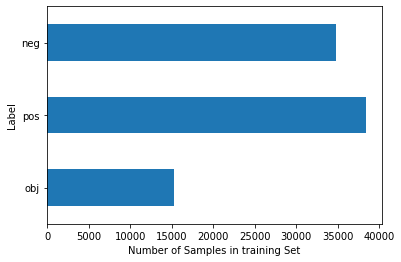

In [ ]:
ax = revs['polarity'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")


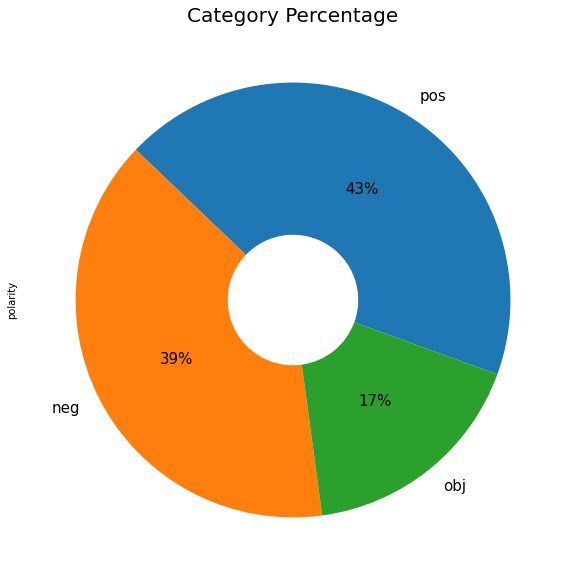

In [ ]:
viz = revs.polarity.value_counts()
plt.figure(figsize=(30,10))
plt.title('Category Percentage', fontsize=20)
viz.plot(kind='pie', labels=viz.index,
                            wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                            textprops={'fontsize': 15})

In [ ]:
revs.replace({'neutral': 'neg'}, inplace=True)
n_count = revs.query("polarity=='neg'").shape[0]
pos = revs.query("polarity=='pos'").sample(n=n_count, random_state=43)
revs = pd.concat([pos, revs.query("polarity!='pos'")], axis=0).sample(frac=1, random_state=43)
revs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19373 entries, 11983 to 16129
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      19372 non-null  object
 1   polarity  19373 non-null  object
dtypes: object(2)
memory usage: 454.1+ KB


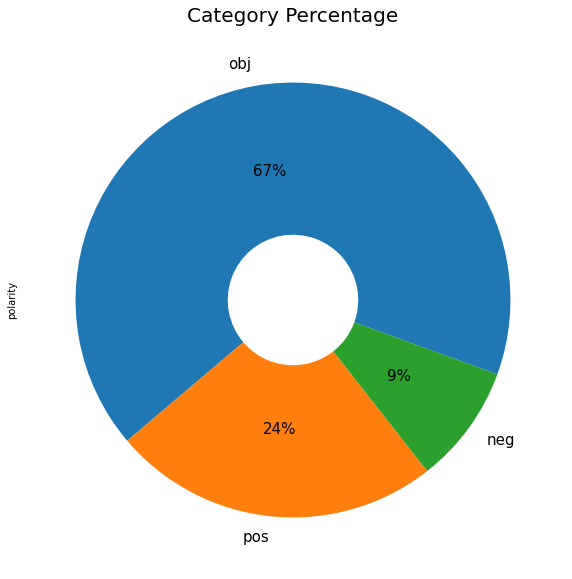

In [ ]:
# revs.replace({'neutral': 'neg'}, inplace=True)
viz = revs.polarity.value_counts()
plt.figure(figsize=(30,10))
plt.title('Category Percentage', fontsize=20)
viz.plot(kind='pie', labels=viz.index,
                            wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                            textprops={'fontsize': 15})

##### **Test Lexicon-based method**

In [ ]:
revs.columns

Index(['polarity'], dtype='object')

In [ ]:
lex = pd.read_csv("../Sentiment_KSA/created_data/Full_lexicons.csv", index_col="lexicon")
revs['lex_sentiment'] = revs.cleaned.astype(str).map(lambda x: sum([lex.loc[w].polarity if w in lex.index else 0 for w in get_all_ngrams(x, nrange=3)])).map(lambda x: 'pos' if x>0 else 'neg' if x<0 else 'NUETRAL')
revs.lex_sentiment.value_counts()

neg        110461
pos         69225
NUETRAL     46140
Name: lex_sentiment, dtype: int64

In [ ]:
lex = pd.read_csv("../Sentiment_KSA/created_data/uncleaned_lexicons.csv", index_col="lexicon")
revs['lex_sentiment'] = revs.text.astype(str).map(lambda x: sum([lex.loc[w].polarity if w in lex.index else 0 for w in get_all_ngrams(x, nrange=3)])).map(lambda x: 'pos' if x>0 else 'neg' if x<0 else 'NUETRAL')
revs.lex_sentiment.value_counts()

neg        17199
pos        11921
NUETRAL    11536
Name: lex_sentiment, dtype: int64

In [ ]:
get_all_ngrams("hi me and no")

['hi',
 'me',
 'and',
 'no',
 'hi_me',
 'me_and',
 'and_no',
 'hi_me_and',
 'me_and_no']

In [ ]:
revs['lex_sentiment'].replace({'NUETRAL': 'obj'}, inplace=True)

0.5839230203785215


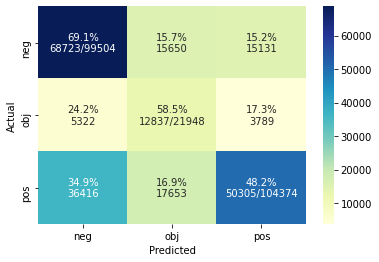

In [ ]:
print(accuracy_score(revs.polarity, revs.lex_sentiment))
plot_cm(revs.polarity, revs.lex_sentiment)

#### **Preprocessing**

In [ ]:
if VER == 3:
    revs["cleaned"] = revs.text.apply(lambda x: remove_longation(str(x), prefix=True)).tolist()
else:
    revs["cleaned"] = revs.text.apply(lambda x: remove_longation(str(x))).tolist()
# msg_words = stem(revs.text) #lemma
# msg_words = remove_stopwords(msg_words)
# revs["msg_stem_stop_words"] = msg_words
# del msg_words
# revs = revs[revs['msg_stem_stop_words'].map(len) >= 3]
print("\n5 random samples:")
revs.sample(5, random_state=43)


5 random samples:


text  ...                                                                                              cleaned
9516                                                                    ÿßŸÑŸÖŸàÿßÿπŸäÿØ Ÿà ŸÇŸäŸÖÿ© ÿßŸÑŸÉÿ¥ŸÅ ŸàŸÉŸäŸÅŸäÿ© ÿßŸÑÿ≠ÿ¨ÿ≤  ...                                                                   ÿßŸÑŸÖŸàÿßÿπŸäÿØ Ÿà ŸÇŸäŸÖÿ© ÿßŸÑŸÉÿ¥ŸÅ ŸàŸÉŸäŸÅŸäÿ© ÿßŸÑÿ≠ÿ¨ÿ≤
12312                                                                            ÿßŸÑÿ±ÿ®ÿßÿ∑ ÿßŸÑÿµŸÑŸäÿ®Ÿä ÿ®Ÿäÿ™ŸÉŸÑŸÅ ŸÉÿßŸÖ  ...                                                                            ÿßŸÑÿ±ÿ®ÿßÿ∑ ÿßŸÑÿµŸÑŸäÿ®Ÿä ÿ®Ÿäÿ™ŸÉŸÑŸÅ ŸÉÿßŸÖ
20701                                                                             ŸÖŸÖŸÉŸÜ ÿ≥ÿπÿ± ÿßŸÑŸÉÿ¥ŸÅ Ÿà ÿßŸÑÿπŸÜŸàÿßŸÜ  ...                                                                             ŸÖŸÖŸÉŸÜ ÿ≥ÿπÿ± ÿßŸÑŸÉÿ¥ŸÅ Ÿà ÿßŸÑÿπŸÜŸàÿßŸÜ
20317                                                                                              ÿßŸÖ ÿßÿ±Ÿäÿ¨  ...                                                                                              ÿßŸÖ ÿßÿ±Ÿäÿ¨
2542   ÿ¨Ÿäÿ™ ÿßŸÑŸÖÿ±ŸÉÿ≤ ŸäŸàŸÖ ÿßŸÑÿßÿ±ÿ®ÿπÿßÿ° ÿßŸÑŸÇÿßÿØŸÖ ŸàÿπŸÖŸÑÿ™ ŸÉÿ¥ŸÅ ŸàÿØÿÆŸÑÿ™ ŸÑŸÑÿØŸÉÿ™Ÿàÿ±Ÿá ŸàÿπŸÖŸÑÿ™ ÿßÿ¥ÿπÿ© ŸàŸÇÿ±ÿ±ÿ™ ÿßŸÜ ÿØŸÉÿ™Ÿàÿ± ÿßŸÑÿ™ŸÇŸàŸäŸÖ ŸÑÿßÿ≤ŸÖ Ÿä...  ...  ÿ¨Ÿäÿ™ ÿßŸÑŸÖÿ±ŸÉÿ≤ ŸäŸàŸÖ ÿßŸÑÿßÿ±ÿ®ÿπÿßÿ° ÿßŸÑŸÇÿßÿØŸÖ ŸàÿπŸÖŸÑÿ™ ŸÉÿ¥ŸÅ ŸàÿØÿÆŸÑÿ™ ŸÑŸÑÿØŸÉÿ™Ÿàÿ±Ÿá ŸàÿπŸÖŸÑÿ™ ÿßÿ¥ÿπÿ© ŸàŸÇÿ±ÿ™ ÿßŸÜ ÿØŸÉÿ™Ÿàÿ± ÿßŸÑÿ™ŸÇŸàŸäŸÖ ŸÑÿßÿ≤ŸÖ ŸäŸÇ...

[5 rows x 3 columns]

#### **Hypertunning**

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB, BernoulliNB
# from sklearn.linear_model import Perceptron
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.decomposition import PCA
# from sklearn.decomposition import SparsePCA
# from sklearn import metrics
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import f_classif
# from sklearn.ensemble.forest import RandomForestClassifier
# from numpy.lib.scimath import sqrt
# from numpy.ma.core import floor
# from sklearn.feature_extraction.text import HashingVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Lasso
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn import svm
# from sklearn import preprocessing
# from pickle import FALSE
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import PassiveAggressiveClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# # from sklearn import cross_validation
# from sklearn.manifold import Isomap
# from sklearn.manifold import SpectralEmbedding
# from sklearn.decomposition import TruncatedSVD


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# # an = analex.Analex()
# tokenizer = str.split #an.text_tokenize
# Features_Generators = [
#     dict(name="count_ng1",
#          feat_generator=CountVectorizer(tokenizer=tokenizer, ngram_range=(1, 1))),
#     dict(name="count_ng2",
#          feat_generator=CountVectorizer(tokenizer=tokenizer, ngram_range=(1, 2))),
#     dict(name="count_ng3",
#          feat_generator=CountVectorizer(tokenizer=tokenizer, ngram_range=(1, 3))),
#     dict(name="tfidf_ng1",
#          feat_generator=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1, 1))),
#     dict(name="tfidf_ng2",
#          feat_generator=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1, 2))),
#     dict(name="tfidf_ng3",
#          feat_generator=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1, 3))),
# ]

# # classifiers
# classifiers = [   dict(name="Logistic Regression", parameter_tunning=False,
#          tune_clf=GridSearchCV(LogisticRegression(), [{'penalty': ['l2'], 'C': [1, 10, 100]}], cv=3),
#          clf=LogisticRegression(penalty='l2', C=1)),
#     dict(name="Passive Aggresive", parameter_tunning=False, clf=PassiveAggressiveClassifier()),
#     dict(name="SVM", parameter_tunning=False, clf=LinearSVC(loss='squared_hinge', penalty="l2", dual=False, tol=1e-3)), #loss='l2' #old
#     dict(name="Perceptron", parameter_tunning=False, clf=Perceptron()),#max_iter=100
#     dict(name="xgboost", parameter_tunning=False, clf=XGBClassifier()),#max_depth=100
#     dict(name="randomForest", parameter_tunning=False, clf=RandomForestClassifier()),
#     #
#     dict(name="bnb", parameter_tunning=False, clf=BernoulliNB(binarize=0.5)),
#     dict(name="mnb", parameter_tunning=False, clf=MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)),
#     dict(name="sgd", parameter_tunning=False, clf=SGDClassifier(loss="hinge", penalty="l2")),
#     dict(name="KNN", parameter_tunning=False, tune_clf=GridSearchCV(KNeighborsClassifier(),
#         [{'n_neighbors': [5, 10, 50, 100], 'metric': ['euclidean', 'minkowski'], 'p': [2, 3, 4, 5]}], cv=5),
#          clf=KNeighborsClassifier(n_neighbors=5, metric='euclidean')),

# ]


In [ ]:
# from sklearn.metrics import f1_score
# # an = analex.Analex()
# tokenizer = str.split #an.text_tokenize
# models = []
# samples = revs#.sample(50000)
# for feat_generator in Features_Generators:
#     # tfidf = TfidfVectorizer(tokenizer=tokenizer, lowercase= False, ngram_range=ngram, max_df=0.7, min_df=5)#, preprocessor=sents, stop_words=cachedStopWords)
#     t = time()
#     X = feat_generator['feat_generator'].fit_transform(samples.msg_stem_stop_words)
#     X_train, X_val, y_train, y_val = train_test_split(X, samples.polarity, test_size=0.2)    
#     for clf in classifiers:
#             # clf = svm.SVC(kernel=kernel)
#             clf['clf'].fit(X_train, y_train)
#             models.append(clf['clf'])
#             print('\nModel-ng={}-ker={}'.format(feat_generator['name'], clf['name']))
#             print("time:",time()-t)
#             predictions = clf['clf'].predict(X_val)
#             print(confusion_matrix(y_val,predictions))  
#             print("F1-score:", f1_score(y_val,predictions, average='weighted'))  
#             print("Accuracy:",accuracy_score(y_val, predictions))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=count_ng1-ker=Logistic Regression
time: 10.162195920944214
[[1980  321  717]
 [ 217 1604  126]
 [ 787  210 2170]]
F1-score: 0.7065195651163838
Accuracy: 0.7075750122970978

Model-ng=count_ng1-ker=Passive Aggresive
time: 12.063017845153809
[[1838  302  878]
 [ 276 1430  241]
 [ 799  185 2183]]
F1-score: 0.6700793390370734
Accuracy: 0.6703148057058534


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Model-ng=count_ng1-ker=SVM
time: 74.35150122642517
[[1966  296  756]
 [ 266 1511  170]
 [ 804  183 2180]]
F1-score: 0.6955054380196033
Accuracy: 0.6956468273487457

Model-ng=count_ng1-ker=Perceptron
time: 75.37702107429504
[[2057  267  694]
 [ 359 1377  211]
 [ 987  180 2000]]
F1-score: 0.6691927119624271
Accuracy: 0.6682242990654206

Model-ng=count_ng1-ker=xgboost
time: 98.663503408432
[[1776  740  502]
 [ 119 1794   34]
 [ 992  582 1593]]
F1-score: 0.6272017911245876
Accuracy: 0.6348991637973438

Model-ng=count_ng1-ker=randomForest
time: 290.76993203163147
[[2005  307  706]
 [ 206 1557  184]
 [ 837  129 2201]]
F1-score: 0.7085140000312108
Accuracy: 0.7086817511067388

Model-ng=count_ng1-ker=bnb
time: 291.71823382377625
[[1328 1094  596]
 [  14 1918   15]
 [ 567 1004 1596]]
F1-score: 0.585406591784215
Accuracy: 0.5954254795868175

Model-ng=count_ng1-ker=mnb
time: 291.89620900154114
[[1958  311  749]
 [ 254 1481  212]
 [ 758  167 2242]]
F1-score: 0.6984105784486481
Accuracy: 0.6985981

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=count_ng2-ker=Logistic Regression
time: 63.014323711395264
[[2099  358  644]
 [ 159 1655  123]
 [ 615  189 2290]]
F1-score: 0.7417514203906395
Accuracy: 0.7432365961633055

Model-ng=count_ng2-ker=Passive Aggresive
time: 65.12201380729675
[[1998  322  781]
 [ 246 1510  181]
 [ 678  172 2244]]
F1-score: 0.7065684820781111
Accuracy: 0.7073290703394

Model-ng=count_ng2-ker=SVM
time: 376.47591376304626
[[2074  341  686]
 [ 173 1611  153]
 [ 667  182 2245]]
F1-score: 0.7280071737583929
Accuracy: 0.7292179045745204

Model-ng=count_ng2-ker=Perceptron
time: 378.07387351989746
[[2140  276  685]
 [ 274 1476  187]
 [ 690  144 2260]]
F1-score: 0.7226954916313534
Accuracy: 0.7225774717166749

Model-ng=count_ng2-ker=xgboost
time: 600.841227054596
[[1808  794  499]
 [ 103 1799   35]
 [ 879  584 1631]]
F1-score: 0.6376484972557466
Accuracy: 0.6441219872110182

Model-ng=count_ng2-ker=randomForest
time: 2855.4201605319977
[[2066  395  640]
 [ 159 1626  152]
 [ 791  181 2122]]
F1-score: 0.713499

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=count_ng3-ker=Logistic Regression
time: 130.53377223014832
[[2121  351  621]
 [ 168 1687  111]
 [ 631  193 2249]]
F1-score: 0.7434435077622106
Accuracy: 0.7448352188883424

Model-ng=count_ng3-ker=Passive Aggresive
time: 134.70252752304077
[[2055  318  720]
 [ 258 1503  205]
 [ 759  186 2128]]
F1-score: 0.6990207810681193
Accuracy: 0.6992129857353665

Model-ng=count_ng3-ker=SVM
time: 768.5896141529083
[[2047  354  692]
 [ 173 1631  162]
 [ 656  200 2217]]
F1-score: 0.7235723602690682
Accuracy: 0.7249139203148057

Model-ng=count_ng3-ker=Perceptron
time: 771.1035397052765
[[2132  215  746]
 [ 299 1426  241]
 [ 644  124 2305]]
F1-score: 0.7214383536116593
Accuracy: 0.720978848991638

Model-ng=count_ng3-ker=xgboost
time: 1324.0309484004974
[[1819  759  515]
 [ 106 1822   38]
 [ 886  570 1617]]
F1-score: 0.6396259059265298
Accuracy: 0.646581406787998

Model-ng=count_ng3-ker=randomForest
time: 6985.256078958511
[[2032  388  673]
 [ 181 1603  182]
 [ 788  177 2108]]
F1-score: 0.70508

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=tfidf_ng1-ker=Logistic Regression
time: 11.616519212722778
[[2118  321  680]
 [ 178 1696   90]
 [ 720  174 2155]]
F1-score: 0.7324928556289559
Accuracy: 0.7340137727496311

Model-ng=tfidf_ng1-ker=Passive Aggresive
time: 13.65174913406372
[[1985  262  872]
 [ 290 1458  216]
 [ 802  168 2079]]
F1-score: 0.6793846033025472
Accuracy: 0.6790457452041319

Model-ng=tfidf_ng1-ker=SVM
time: 15.44552230834961
[[2093  275  751]
 [ 214 1617  133]
 [ 706  163 2180]]
F1-score: 0.7235880804964975
Accuracy: 0.7242990654205608

Model-ng=tfidf_ng1-ker=Perceptron
time: 16.084158897399902
[[1985  249  885]
 [ 319 1443  202]
 [ 815  165 2069]]
F1-score: 0.6765531688423513
Accuracy: 0.6759714707329071

Model-ng=tfidf_ng1-ker=xgboost
time: 59.338651180267334
[[1830  773  516]
 [  92 1841   31]
 [ 852  524 1673]]
F1-score: 0.6506065894138782
Accuracy: 0.6571569109690113

Model-ng=tfidf_ng1-ker=randomForest
time: 237.42586636543274
[[2075  377  667]
 [ 165 1670  129]
 [ 745  153 2151]]
F1-score: 0.72

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=tfidf_ng2-ker=Logistic Regression
time: 62.151023626327515
[[2161  342  578]
 [ 186 1688   82]
 [ 671  195 2229]]
F1-score: 0.7462434977410095
Accuracy: 0.7474176094441711

Model-ng=tfidf_ng2-ker=Passive Aggresive
time: 63.38266468048096
[[2078  302  701]
 [ 196 1628  132]
 [ 641  187 2267]]
F1-score: 0.7334416403602015
Accuracy: 0.7345056566650271

Model-ng=tfidf_ng2-ker=SVM
time: 70.40996956825256
[[2150  309  622]
 [ 178 1677  101]
 [ 634  184 2277]]
F1-score: 0.7494895680439491
Accuracy: 0.750614854894245

Model-ng=tfidf_ng2-ker=Perceptron
time: 71.15673232078552
[[1999  329  753]
 [ 190 1615  151]
 [ 595  205 2295]]
F1-score: 0.7250830952047648
Accuracy: 0.7266355140186916

Model-ng=tfidf_ng2-ker=xgboost
time: 336.31861448287964
[[1822  754  505]
 [ 101 1821   34]
 [ 921  532 1642]]
F1-score: 0.6429362483987905
Accuracy: 0.6499016232169208

Model-ng=tfidf_ng2-ker=randomForest
time: 2605.1152725219727
[[2053  398  630]
 [ 162 1663  131]
 [ 811  187 2097]]
F1-score: 0.7131

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=tfidf_ng3-ker=Logistic Regression
time: 140.46474289894104
[[2194  326  552]
 [ 186 1680   93]
 [ 776  191 2134]]
F1-score: 0.7377105866207411
Accuracy: 0.7388096409247418

Model-ng=tfidf_ng3-ker=Passive Aggresive
time: 142.61455368995667
[[2083  313  676]
 [ 157 1683  119]
 [ 686  189 2226]]
F1-score: 0.7353672572442618
Accuracy: 0.7368421052631579

Model-ng=tfidf_ng3-ker=SVM
time: 159.17082047462463
[[2148  320  604]
 [ 153 1708   98]
 [ 708  185 2208]]
F1-score: 0.7442727956238647
Accuracy: 0.7456960157402853

Model-ng=tfidf_ng3-ker=Perceptron
time: 160.40911626815796
[[2051  299  722]
 [ 162 1644  153]
 [ 682  190 2229]]
F1-score: 0.7272325722435522
Accuracy: 0.7284800787014265

Model-ng=tfidf_ng3-ker=xgboost
time: 763.8503561019897
[[1805  728  539]
 [  89 1844   26]
 [ 980  515 1606]]
F1-score: 0.6377516197157618
Accuracy: 0.6462124938514511

Model-ng=tfidf_ng3-ker=randomForest
time: 6262.765538692474
[[2017  398  657]
 [ 130 1700  129]
 [ 831  185 2085]]
F1-score: 0.71

In [ ]:
vec = 5
clas = 3
models[(vec-1) * len(classifiers) + clas-1]

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)

#### **Vectorization**

In [ ]:
flag_tfidf = False
flag_lstm = True
t = time()
if flag_tfidf:
    # Using TFIDF vectorizer
    # an = analex.Analex()
    tokenizer = str.split #an.text_tokenize
    tfidf = TfidfVectorizer(tokenizer=tokenizer, lowercase= False, ngram_range=(1,2), max_features=5000, max_df=0.7, min_df=5)#, preprocessor=sents, stop_words=cachedStopWords)
    X = tfidf.fit_transform(revs.msg_stem_stop_words)
else:
    # Using Word2Vec
    wtv_vect = WordVecVectorizer(word2vec)
    X = wtv_vect.instance_transform(revs.cleaned.astype(str)) if flag_lstm else wtv_vect.transform(revs.cleaned.astype(str))
print(time()-t)
X_train, X_val, y_train, y_val = train_test_split(X, revs.polarity, test_size=0.2, random_state=10)


2.2139973640441895


In [ ]:
X.shape[0] - X.any(1).sum()

-6798765

In [ ]:
X.shape

(22935, 50, 300)

##### SAVE TFIDF

In [ ]:
import pickle
with open(os.path.join('../Sentiment_task/models', 'tfidf_features.pkl'), 'wb') as fid:
    pickle.dump(tfidf.vocabulary_, fid)    
    pickle.dump(tfidf.idf_, fid)

In [ ]:
flag_tfidf = True
with open(os.path.join('../Sentiment_task/models', 'tfidf_features.pkl'), 'rb') as fid:
    vocabulary = pickle.load(fid)
    idfs = pickle.load(fid)

In [ ]:
tokenizer = str.split
tfidf = TfidfVectorizer(tokenizer=tokenizer, lowercase= False, ngram_range=(1,2), max_features=5000, vocabulary=vocabulary , max_df=0.7, min_df=5)#, preprocessor=sents, stop_words=cachedStopWords)
tfidf.idf_=idfs

In [ ]:
X = tfidf.fit_transform(revs.msg_stem_stop_words)
X_train, X_val, y_train, y_val = train_test_split(X, revs.polarity, test_size=0.2, random_state=10)

In [ ]:
# (tfidf.transform(revs.msg_stem_stop_words[:3]).toarray()==tfidf2.transform(revs.msg_stem_stop_words[:3]).toarray()).all()

True

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(18348, 50, 300)
(18348,)
(4587, 50, 300)
(4587,)


In [ ]:
# import numpy as np

# X_train.__sizeof__()/ np.prod(X_train.shape)
225823*50*300*8/1024/1024/1024
225823 - 20 *1024*1024*1024/8/300/50

46866.02933333334

#### **Machine learning (SVM) model**

##### **Model Train**

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### **Performance metrics**

In [ ]:
predictions = clf.predict(X_val)

print(confusion_matrix(y_val,predictions))
print(classification_report(y_val,predictions))
print(accuracy_score(y_val, predictions))

[[ 319   67   33]
 [  22 2985   85]
 [  50  162  864]]
              precision    recall  f1-score   support

         neg       0.82      0.76      0.79       419
         obj       0.93      0.97      0.95      3092
         pos       0.88      0.80      0.84      1076

    accuracy                           0.91      4587
   macro avg       0.87      0.84      0.86      4587
weighted avg       0.91      0.91      0.91      4587

0.9086548942664051


In [ ]:
# print('              precision    recall  f1-score   support\n\n         neg       0.79      0.47      0.59      4127\n         pos       0.78      0.94      0.86      8525\n\n    accuracy                           0.79     12652\n   macro avg       0.79      0.70      0.72     12652\nweighted avg       0.79      0.79      0.77     12652\n')

In [ ]:
pd.Series(predictions).value_counts()

obj    3214
pos     982
neg     391
dtype: int64

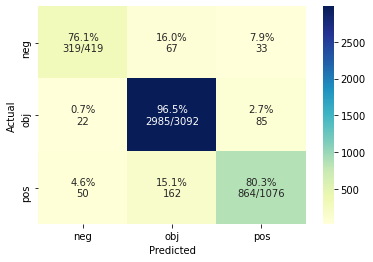

In [ ]:
plot_cm( y_val,  predictions)

##### Save / restore SVM model

In [ ]:
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
models_path=os.path.join(curDir,'models')
if not os.path.exists(models_path):
    os.makedirs(models_path)

In [ ]:
import pickle
with open(os.path.join(models_path, 'svm_classifier_w2v.sav'), 'wb') as fid:
    pickle.dump(clf, fid)    


In [ ]:
# load it again
with open(os.path.join(models_path, 'svm_classifier_w2v.sav'), 'rb') as fid:
    clf = pickle.load(fid)

#### **Deep Learning Model**

##### Preparing data

In [ ]:
if not isinstance(X_train, np.ndarray):
    X_train = X_train.toarray()
    X_val = X_val.toarray()
labelencoder = LabelEncoder()
l = list(set(y_train))
l.sort()
y_train = to_categorical(labelencoder.fit_transform(y_train))
y_val = to_categorical(labelencoder.transform(y_val))
int_category = dict(zip(labelencoder.transform(l), l))
category_int = dict(zip(l, labelencoder.transform(l)))
cats = len(category_int)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape) 

3
(18348, 50, 300)
(18348, 3)
(4587, 50, 300)
(4587, 3)


In [ ]:
print(int_category)
classes = revs.polarity.value_counts()
print(classes.to_dict())
print(category_int)
class_weight = dict(map(lambda x: (category_int[x[0]], (1 / x[1])*(classes.sum())*2.0), classes.items()))
class_weight

{0: 'neg', 1: 'obj', 2: 'pos'}
{'obj': 15311, 'pos': 5593, 'neg': 2031}
{'neg': 0, 'obj': 1, 'pos': 2}


{0: 22.58493353028065, 1: 2.9958853112141597, 2: 8.201323082424459}

##### Model Build

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, GlobalMaxPool1D
# inp = np.random.randn(100, 5, 16)
# input = Input(inp.shape[1:])
# lstm = keras.layers.LSTM(8, dropout=0.3, return_sequences=True)
# out = keras.layers.SimpleRNN(3)
# out(lstm(input)).shape

In [ ]:
def modelBuild(input_shape, layers, dense_out, lstm=False, name=None):
    NumLyrs = len(layers)
    sentence_indices = Input(input_shape, name="input")
    X = sentence_indices
    dense_start = 0
    if lstm:
        X = Bidirectional(LSTM(layers[0], dropout=0.45, return_sequences=True, name="lstm_1"), 
                        #   backward_layer=LSTM(layers[0], activation='relu', return_sequences=True,  go_backwards=True, name="lstm_2"), 
                          name="bidirectional")(X)
        X = GlobalMaxPool1D(name="global_max_pooling1d")(X)
        # X = SimpleRNN(layers[0], dropout=0.55)(X)
        dense_start += 1
    # The returned output should be a batch of sequences.
    for layer in range(dense_start, NumLyrs):
        X = Dense(layers[layer], activation='relu', name="dense_{}".format(layer))(X)
        X = Dropout(0.45, name="dropout_{}".format(layer))(X)
    X = Dense(dense_out, activation='softmax', name="dense_{}".format(NumLyrs))(X) # Number of classes
    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs=sentence_indices, outputs=X, name=name)
    return model

##### Hyper tuning

In [ ]:
layers = [
        #   [512, 256, 128, 64, 32],
          [64, 64, 64],
          [256, 64, 16],
          [256, 128, 256, 64],
          [128, 128, 64, 64],
          [256, 16],
          [128, 512, 256, 64],
          [256, 256, 256],
          [256, 256, 128],
          [256, 128, 128],
          [256, 256],
          [128, 128],
          [64, 32],
          [128, 32],
          ]
cats = len(int_category)
input_shape = X_train.shape[1:]

In [ ]:
min_score = 1000
max_acc = 0
i = 1
for dense_layers in layers:
    for opt in [Adam, Adamax]:
        for batch_size in [256, 1024, 2048]:
            for lr in [1e-2, 1e-3, 1e-4]:
                for decay in [1e-7]:
                    model = modelBuild(input_shape, dense_layers, cats, lstm=True, name='model_{}'.format(1))
                    print('model_{}'.format(i))
                    print("layers:", dense_layers)
                    optimizer = opt(lr=lr, decay=decay, name=str(opt).split(".")[-1].split("'")[0])
                    parameters = [dense_layers, optimizer.get_config()['name'], batch_size, lr, decay, int_category]
                    print("optimizer:", optimizer.get_config()['name'])
                    print("batch_size={}, learning_rate={}, decay={}".format(batch_size, lr, decay))
                    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                    # Train model
                    tbCallBack = TensorBoard(log_dir='log', histogram_freq=0, write_graph=False, write_images=True)
                    earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=2, restore_best_weights=True)

                    history = model.fit(X_train,
                                        y_train,
                                        epochs=500,
                                        batch_size=batch_size,
                                        validation_data=(X_val, y_val),
                                        shuffle=True,
                                        verbose = 2,
                                        callbacks=[tbCallBack,earlystop])

                    score, acc = model.evaluate(X_val, y_val, batch_size=256)   
                    print('Score: %1.4f' % score)
                    print('Accuracy: %1.4f' % acc)
                    if score < min_score:
                        min_score = score
                        best_score_model = model
                        save_keras_model(best_score_model, 
                                         {"param": parameters, "score": score, "acc": acc}, 
                                         model_name='best_score_FCNN')
                        print("-----------------------------------------> BEST SCORE", score)
                    if acc > max_acc:
                        max_acc = acc
                        best_acc_model = model
                        save_keras_model(best_acc_model, 
                                         {"param": parameters, "score": score, "acc": acc},
                                         model_name='best_acc_FCNN')
                        print("-----------------------------------------> BEST ACC", acc)
                    i += 1
                    print("============================================================\n")


# save_keras_model(best_score_model, model_name='best_score_FCNN')
# save_keras_model(best_acc_model, model_name='best_acc_FCNN')


Streaming output truncated to the last 5000 lines.
9/9 - 1s - loss: 1.0398 - accuracy: 0.5687 - val_loss: 1.0271 - val_accuracy: 0.6743
Epoch 4/500
9/9 - 1s - loss: 1.0206 - accuracy: 0.5948 - val_loss: 1.0059 - val_accuracy: 0.6741
Epoch 5/500
9/9 - 1s - loss: 1.0016 - accuracy: 0.6057 - val_loss: 0.9845 - val_accuracy: 0.6741
Epoch 6/500
9/9 - 1s - loss: 0.9835 - accuracy: 0.6142 - val_loss: 0.9629 - val_accuracy: 0.6741
Epoch 7/500
9/9 - 1s - loss: 0.9632 - accuracy: 0.6201 - val_loss: 0.9406 - val_accuracy: 0.6741
Epoch 8/500
9/9 - 1s - loss: 0.9505 - accuracy: 0.6212 - val_loss: 0.9181 - val_accuracy: 0.6741
Epoch 9/500
9/9 - 1s - loss: 0.9317 - accuracy: 0.6227 - val_loss: 0.8948 - val_accuracy: 0.6741
Epoch 10/500
9/9 - 1s - loss: 0.9147 - accuracy: 0.6277 - val_loss: 0.8681 - val_accuracy: 0.6741
Epoch 11/500
9/9 - 1s - loss: 0.8951 - accuracy: 0.6284 - val_loss: 0.8324 - val_accuracy: 0.6765
Epoch 12/500
9/9 - 1s - loss: 0.8663 - accuracy: 0.6290 - val_loss: 0.7883 - val_accur

In [ ]:
print(min_score, max_acc)
print(best_acc_model.name)
print(best_score_model.name)

0.45755207538604736 0.7920781373977661
model_143
model_143


In [ ]:
best_score_parameters['param']

[[256, 256], 'Adamax', 1024, 0.01, 1e-07, {0: 'neg', 1: 'obj', 2: 'pos'}]

##### Training

In [ ]:
best_score_model, best_score_parameters = load_keras_model('best_score_FCNN')
print(best_score_parameters)
print(best_score_model.summary())
"""
[128, 512, 256, 64]
<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f53303afc88>
batch_size=128, learning_rate=0.0005, decay=1e-09
loss: 0.5683 - accuracy: 0.7449
"""
best_acc_model, best_acc_parameters = load_keras_model('best_acc_FCNN')
print(best_acc_parameters)
print(best_acc_model.summary())
"""
[64, 64, 64]
"""
# last documented"
"""
[128, 512, 256, 64]
SGD 
batch_size=256, learning_rate=0.01, decay=1e-07
"""
print()

{'param': [[256, 256], 'Adamax', 1024, 0.01, 1e-07, {0: 'neg', 1: 'obj', 2: 'pos'}], 'score': 0.21245937049388885, 'acc': 0.9215173125267029}
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_175 (InputLayer)       [(None, 50, 300)]         0         
_________________________________________________________________
bidirectional_174 (Bidirecti (None, 50, 512)           1140736   
_________________________________________________________________
global_max_pooling1d_174 (Gl (None, 512)               0         
_________________________________________________________________
dense_546 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_372 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_547 (Dense)            (None, 3)           

In [ ]:
dense_layers, opt_name, batch_size, lr, decay, int_category = best_score_parameters['param']

# batch_size = 256
# lr = 1e-4
# decay = 1e-7
# dense_layers = [256, 256]
cats = len(int_category)

input_shape = X_train.shape[1:]
if flag_lstm:
    model = modelBuild(input_shape, dense_layers, cats, lstm=True, name="model")
else:
    model = modelBuild(input_shape, dense_layers, cats, name='model') #best_score_model
print(model.summary())
if opt_name=='Adamax':
    opt = Adamax(lr=lr, decay=decay)
else:
    opt = Adam(lr=lr, decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 50, 300)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 512)           1140736   
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 1,272,835
Trainable params: 1,272,835
Non-trainable params: 0
___________________________________________________

In [ ]:
# Train model
tbCallBack = TensorBoard(log_dir='log', histogram_freq=0, write_graph=False, write_images=True)
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=2, restore_best_weights=True)
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose = 2,
                    callbacks=[tbCallBack,earlystop],
                    class_weight=class_weight,
                    )



Epoch 1/200
18/18 - 6s - loss: 4.4134 - accuracy: 0.6679 - val_loss: 0.4757 - val_accuracy: 0.8210
Epoch 2/200
18/18 - 2s - loss: 2.6854 - accuracy: 0.8351 - val_loss: 0.3448 - val_accuracy: 0.8679
Epoch 3/200
18/18 - 2s - loss: 2.3628 - accuracy: 0.8592 - val_loss: 0.2968 - val_accuracy: 0.8906
Epoch 4/200
18/18 - 2s - loss: 2.2141 - accuracy: 0.8696 - val_loss: 0.3275 - val_accuracy: 0.8760
Epoch 5/200
18/18 - 2s - loss: 2.1743 - accuracy: 0.8720 - val_loss: 0.2654 - val_accuracy: 0.9002
Epoch 6/200
18/18 - 2s - loss: 2.0094 - accuracy: 0.8811 - val_loss: 0.2653 - val_accuracy: 0.9002
Epoch 7/200
18/18 - 2s - loss: 1.8420 - accuracy: 0.8891 - val_loss: 0.2518 - val_accuracy: 0.9089
Epoch 8/200
18/18 - 2s - loss: 1.8025 - accuracy: 0.8905 - val_loss: 0.2450 - val_accuracy: 0.9104
Epoch 9/200
18/18 - 2s - loss: 1.6406 - accuracy: 0.8978 - val_loss: 0.2631 - val_accuracy: 0.9010
Epoch 10/200
18/18 - 2s - loss: 1.5392 - accuracy: 0.9043 - val_loss: 0.2601 - val_accuracy: 0.9023
Epoch 11/

In [ ]:
score, acc = model.evaluate(X_val, y_val, batch_size=batch_size)
parameters = {"param": [dense_layers, opt_name, batch_size, lr, decay, int_category], "score": score, "acc": acc}
print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)


5/5 [==============================] - 0s 39ms/step - loss: 0.2739 - accuracy: 0.9172
Score: 0.2739
Accuracy: 0.9172


##### Evaluation

In [ ]:
int_category

{0: 'neg', 1: 'obj', 2: 'pos'}

5/5 [==============================] - 0s 2ms/step - loss: 0.7520 - accuracy: 0.9113
Score: 0.7520
Accuracy: 0.9113
[[ 319   64   36]
 [  18 2995   79]
 [  48  162  866]]
              precision    recall  f1-score   support

         neg       0.83      0.76      0.79       419
         obj       0.93      0.97      0.95      3092
         pos       0.88      0.80      0.84      1076

    accuracy                           0.91      4587
   macro avg       0.88      0.84      0.86      4587
weighted avg       0.91      0.91      0.91      4587

0.9112709832134293


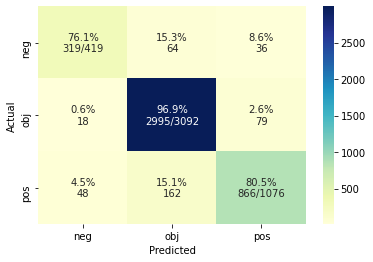

In [ ]:
# Evaluate model
score, acc = model.evaluate(X_val, y_val, batch_size=batch_size)
    
print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = model.predict(X_val)

print(confusion_matrix(y_val.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_val.argmax(axis=1),predictions.argmax(axis=1), target_names=int_category.values()))  
print(accuracy_score(y_val.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_val.argmax(axis=1),  predictions.argmax(axis=1), labels=int_category.values())

5/5 [==============================] - 0s 41ms/step - loss: 0.2393 - accuracy: 0.9126
Score: 0.2393
Accuracy: 0.9126
[[ 358   32   29]
 [  47 2914  131]
 [  48  114  914]]
              precision    recall  f1-score   support

         neg       0.79      0.85      0.82       419
         obj       0.95      0.94      0.95      3092
         pos       0.85      0.85      0.85      1076

    accuracy                           0.91      4587
   macro avg       0.86      0.88      0.87      4587
weighted avg       0.91      0.91      0.91      4587

0.9125790276869413


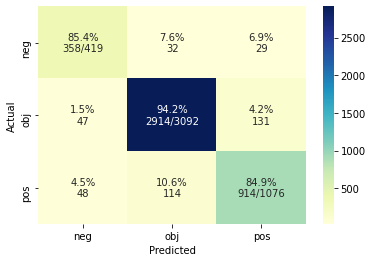

In [ ]:
# Evaluate model
score, acc = model.evaluate(X_val, y_val, batch_size=batch_size)
    
print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = model.predict(X_val)

print(confusion_matrix(y_val.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_val.argmax(axis=1),predictions.argmax(axis=1), target_names=int_category.values()))  
print(accuracy_score(y_val.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_val.argmax(axis=1),  predictions.argmax(axis=1), labels=int_category.values())

##### Train on negative

In [ ]:
neg = revs.query("polarity=='neg'").dropna()
s = neg.cleaned.values[29]
# print(s)
for i, s in neg.cleaned.iteritems():
    if int_category[model.predict(wtv_vect.instance_transform([s])).argmax()] != 'neg':
        print("{}. {}".format(i, s))

30. nan
139. ŸÖÿ≥ÿ™ÿπÿ¨ŸÑŸá ÿ∑ŸàŸÑ ŸàŸÇÿ™Ÿáÿß ÿ™ŸÇŸàŸÑ ÿ®ÿ≥ÿ±ÿπŸá ÿ®ÿ≥ÿ±ÿπŸá Ÿàÿ±ÿßŸÉŸä ÿ®Ÿäÿ¥ŸÜ ÿßŸÜÿß ÿØÿßŸÅÿπŸá ÿπÿ¥ÿßŸÜ ÿ™ÿ¥ŸàŸÅŸä ÿ≠ÿßŸÑÿ™Ÿä ÿ®ÿ¥ŸÉŸÑ ÿØŸÇŸäŸÇ ÿ®ÿßŸÑÿßÿÆŸäÿ± ŸÖÿ¥Ÿä ÿ≠ÿßŸÑŸÉ
398. ÿÆŸÑÿßŸÅ ÿßŸÑÿ™ŸàŸÇÿπ ÿπŸÑŸÖÿß ÿßŸÜÿß ÿßŸÑÿ≠ÿ¨ÿ≤ ÿ®ÿßÿ≥ŸÖ ÿØŸÉÿ™Ÿàÿ± ŸàŸÖŸÜ ŸÇÿßŸÖ ÿ®ÿßŸÑŸÉÿ¥ŸÅ ÿØŸÉÿ™Ÿàÿ± ÿßÿÆÿ± ŸÖÿπ ÿßŸÑÿßÿ≥ŸÅ
531. siaa
536. ŸÅŸä ÿ™ÿßŸÖŸäŸÜ
701. Ÿäÿß ÿ±ÿ® ÿ®ŸÉÿ±ÿß ŸÜÿµÿ≠Ÿä Ÿà ŸÜŸÑÿßŸÇŸäŸÉ Ÿäÿß ÿØŸÉÿ™Ÿàÿ± ÿ≠ÿ≥ŸÜ ŸÖŸàÿ∂ÿ≠ŸÑŸÜÿß ŸÉŸÑÿßŸÖŸÉ ÿπŸÑÿ¥ÿßŸÜ ŸÜŸÅŸáŸÖ ÿ®ŸÑÿßÿ¥ ÿßŸÑÿ®Ÿàÿ≥ÿ™ÿßÿ™ ÿØŸä ŸÉŸÅÿßŸäÿ© ÿ≠ÿ∑ ÿ®ŸÇÿß ÿ≠ÿßÿ¨ÿ© ŸÜŸÅŸáŸÖŸáÿß ÿπŸÜ ÿ™ŸÇÿØŸÖ ÿßŸÑÿ∑ÿ® ÿßÿ¥ÿ±ÿ≠ŸÑŸÜÿß ÿπŸÜ ŸÉŸÑ ÿ≠ÿßŸÑÿ© Ÿäÿß ÿ±Ÿäÿ™
1019. ÿßŸÜÿ™ÿ∏ÿßÿ±ŸÖÿØÿ©ÿ∑ŸàŸäŸÑÿ©ŸÑÿπŸÖŸÑ ÿßŸÑÿßÿ¥ÿπÿ©
1624. ŸÉÿ¥ŸÅŸäŸá Ÿ°Ÿ•Ÿ† ÿßÿ¥ ŸÅŸäŸá
1628. ÿ±ŸÉÿ≤Ÿàÿß Ÿäÿß ÿ¨ŸÖÿßÿπÿ© ÿ™ÿØÿÆŸÑ ÿßŸä ÿπŸÖŸÑŸäÿ© ÿ®ÿ≥ÿπÿ± Ÿàÿ™ÿ∑ŸÑÿπ ÿßŸÑÿ≥ÿπÿ± ÿØÿ®ŸÑ ÿßŸÑÿßÿ∑ÿ®ÿßÿ° ŸÖÿ∑ŸÑŸàÿ® ŸÖŸÜŸáŸÖ ÿØÿÆŸÑ ŸÖÿπŸäŸÜ ŸäÿπŸÜŸä ÿ®ŸäŸÇŸàŸÑŸÉ ÿ™ÿ≠ÿßŸÑŸäŸÑ ŸÅÿ≠Ÿàÿµÿßÿ™ Ÿàÿßÿ¥ÿπÿ© ŸÑŸà ÿπŸÜÿØŸÉ ÿ≤ŸÉÿßŸÖ ŸàÿßŸÑŸÖÿ≠ÿßÿ≥ÿ® ÿßŸÑŸÖÿµÿ±Ÿä ÿßŸÑŸÉŸÑÿ® ÿ®ŸäŸÇŸàŸÑŸÉ ÿ

In [ ]:
neg.loc[139,'cleaned']
to_categorical(category_int['neg'], num_classes=3)
model.train_on_batch(wtv_vect.instance_transform([neg.loc[139, 'cleaned']]), to_categorical(category_int['neg'], num_classes=3).reshape(1, -1))

[0.2396833300590515, 0.9123800992965698]

In [ ]:
# n_X = wtv_vect.instance_transform(neg.cleaned.astype(str))
# n_y = to_categorical(labelencoder.transform(neg.polarity.astype(str)), num_classes=cats)
# model.train_on_batch()
wtv_vect.instance_transform([neg.loc[139, 'cleaned']]).shape
to_categorical(category_int['neg'], num_classes=3).reshape(1, -1).shape

(1, 50, 300)

##### Save / restore FCNN model

In [ ]:
# model.save_weights(os.path.join('models','FCNN_w2v_model_weights_2.hdf5'))
# with open(os.path.join('models','FCNN_w2v_model_architecture_2.json'), 'w') as f:
#     f.write(model.to_json())
if flag_lstm:
    if flag_tfidf:
        save_keras_model(model, parameters ,model_name='FCNN_tfidf_lstm_model', path='../Evaluation/models/')
    else:
        save_keras_model(model, parameters ,model_name='FCNN_w2v_lstm_model', path='./models/')#using new w2v
else:
    if flag_tfidf:
        save_keras_model(model, parameters ,model_name='FCNN_tfidf_model', path='../Evaluation/models/')
    else:
        save_keras_model(model, parameters ,model_name='FCNN_w2v_model', path='../Evaluation/models/')

In [ ]:
# path = 'models'
# with open(os.path.join(path,'FCNN_w2v_model_architecture_2.json'), 'r') as f:
#     loaded_model = model_from_json(f.read())
# loaded_model.load_weights(os.path.join(path,'FCNN_w2v_model_weights_2.hdf5'))

# if flag_tfidf:
#     model, parameters = load_keras_model('FCNN_tfidf_model')
# else:
#     model, parameters = load_keras_model('FCNN_w2v_model')
model, parameters = load_keras_model(model_name='FCNN_w2v_lstm_model', path='./models/')
dense_layers, opt_name, batch_size, lr, decay, int_category = parameters['param']

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 50, 300)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 512)           1140736   
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 1,272,835
Trainable params: 1,272,835
Non-trainable params: 0
___________________________________________________

5/5 [==============================] - 0s 38ms/step - loss: 10.9897 - accuracy: 0.0994
Score: 10.9897
Accuracy: 0.0994
[[ 341    0   78]
 [3072    0   20]
 [ 961    0  115]]
              precision    recall  f1-score   support

         neg       0.08      0.81      0.14       419
         obj       0.00      0.00      0.00      3092
         pos       0.54      0.11      0.18      1076

    accuracy                           0.10      4587
   macro avg       0.21      0.31      0.11      4587
weighted avg       0.13      0.10      0.05      4587

0.09941137998691955


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


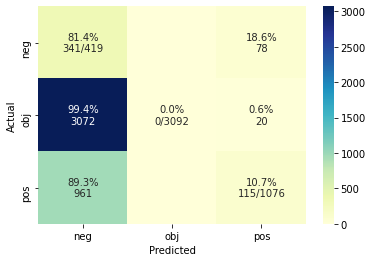

In [ ]:
# Evaluate model
if opt_name=='Adamax':
    opt = Adamax(lr=lr, decay=decay)
else:
    opt = Adam(lr=lr, decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.evaluate(X_train, y_train, batch_size=batch_size)
score, acc = model.evaluate(X_val, y_val, batch_size=batch_size)
    
print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = model.predict(X_val)

print(confusion_matrix(y_val.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_val.argmax(axis=1),predictions.argmax(axis=1), target_names=int_category.values()))  
print(accuracy_score(y_val.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_val.argmax(axis=1),  predictions.argmax(axis=1), labels=int_category.values())

##### Feedback learning

In [ ]:
def feedback_learing(text,correct_pred):
    assert isinstance(text, str) and correct_pred in category_int.keys()
    X = remove_longation(text)
    X = wtv_vect.instance_transform([X])
    Y = category_int[correct_pred]
    Y = to_categorical(Y, num_classes=cats).reshape(-1, cats)
    print(model.train_on_batch(X,Y))
    # model.save('model.h5')


In [ ]:
def predict_sentiment(text):
    assert isinstance(text, str)
    X = remove_longation(text)
    X = wtv_vect.instance_transform([X])
    pred = model.predict(X, verbose=True)
    # pred=pred.reshape(pred.shape[0],)[0]
    return int_category[pred.argmax()],pred
 

In [ ]:
if __name__ == "__main__":
    while(True):
        user_messege=input("Hi, please enter a message to test model prediction: ")
        if user_messege == 'STOPNOW223':
            break
        pred,score=predict_sentiment(user_messege)
        print(pred,'\n',"score: ",score)
        feedback=input("Was it the correct prediction? [Y/N] ")
        if(feedback.lower()=='n'):
            correct = input("Please insert the correct label from {}: ".format(list(category_int.keys())))
            while correct not in category_int.keys(): correct = input("Wrong value\nPlease insert the correct label from: {}".format(list(category_int.keys())))
            feedback_learing(user_messege, correct)

Hi, please enter a message to test model prediction: ŸÖŸÖŸÉŸÜ ÿßÿπÿ±ŸÅ ÿßŸÑŸÖŸàÿßÿπŸäÿØ
1/1 [==============================] - 0s 14ms/step
neg 
 score:  [[0.9928109  0.00343288 0.00375619]]
Was it the correct prediction? [Y/N] N
Please insert the correct label from ['neg', 'obj', 'pos']: obj
[5.309720516204834, 0.28814297914505005]
Hi, please enter a message to test model prediction: STOPNOW223


### IV. Testing our data

#### Combine samples

In [ ]:
df_fb = pd.read_csv("../Evaluation/data/FB_comments_combined.csv").dropna(subset=['cleaned'])

print(df_fb.columns)
df_fb_1 = pd.read_csv("../Evaluation/data/Facebook_EG.csv", index_col=0)
print(df_fb_1.columns)
df_fb_2 = pd.read_csv("../Evaluation/data/Facebook_KSA.csv", index_col=0)
print(df_fb_2.columns)
df_fb_3 = pd.read_csv("../Evaluation/data/Facebook_Removed_KSA.csv", index_col=0)
print(df_fb_3.columns)
df_FB = pd.concat([df_fb_1, df_fb_2, df_fb_3])

Index(['message', 'created_time', 'id', 'comment_created_time',
       'comment_message', 'comment_id', 'post_id', 'page_name', 'platform',
       'cleaned', 'predicted', 'tags', 'inquiry', 'ALL_Categories', 'langs'],
      dtype='object')
Index(['created_time', 'from', 'id', 'post_id', 'file_name', 'message',
       'cleaned', 'langs', 'predicted', 'tags', 'inquiry', 'ALL_Categories'],
      dtype='object')
Index(['created_time', 'from', 'id', 'post_id', 'file_name', 'message',
       'cleaned', 'langs', 'predicted', 'tags', 'inquiry', 'ALL_Categories'],
      dtype='object')
Index(['created_time', 'from', 'id', 'post_id', 'file_name', 'message',
       'cleaned', 'langs', 'predicted', 'tags', 'inquiry', 'ALL_Categories'],
      dtype='object')


In [ ]:
print(df_fb.isna().sum(), df_FB.isna().sum())

message                   699
created_time                0
id                          0
comment_created_time        0
comment_message             0
comment_id                  0
post_id                     0
page_name                   0
platform                    0
cleaned                     0
predicted                   0
tags                    13886
inquiry                     0
ALL_Categories              0
langs                       0
dtype: int64 created_time          0
from              41192
id                    0
post_id               0
file_name             0
message               0
cleaned               0
langs                 0
predicted             0
tags              26379
inquiry               0
ALL_Categories        0
dtype: int64


In [ ]:
df_facebook = pd.concat([df_fb.drop('message', axis=1).rename(columns={"comment_message": "message"}), df_FB]).dropna(axis=1).drop_duplicates()

In [ ]:
df_facebook.to_csv("../new_datasets/all_facebook.csv", index=False)

In [ ]:
df_test = pd.read_csv("../new_datasets/all_facebook.csv")

#### prepare vectorizers

**Note:**
load the prediction model first

In [ ]:
# flag_tfidf = False
# flag_lstm=False
if flag_tfidf:
    with open(os.path.join('../Sentiment_task/models', 'tfidf_features.pkl'), 'rb') as fid:
        vocabulary = pickle.load(fid)
        idfs = pickle.load(fid)
    tfidf2 = TfidfVectorizer(tokenizer=tokenizer, lowercase= False, ngram_range=(1,2), max_features=5000, vocabulary=vocabulary )#, max_df=0.7, min_df=5)#, preprocessor=sents, stop_words=cachedStopWords)
    tfidf2.idf_=idfs
else:
    VER = 2
    word2vec = KeyedVectors.load_word2vec_format('../Sentiment_task/models/w2v_checkpoints_V'+str(VER)+'/w2v_model.bin', binary=True)
    # word2vec = Word2Vec.load('../Sentiment_task/models/w2v_checkpoints/w2v_model_epoch15.gz').wv ## very bad results
    wtv_vect = WordVecVectorizer(word2vec)
    # if lstm: vect = WordVecVectorizer_2(word2vec)

In [ ]:
FCNN = True
t = time()
if flag_tfidf:
    X_test = tfidf.transform(df_test["msg_stem_stop_words"]).toarray()
else:
    if flag_lstm:
        X_test = wtv_vect.instance_tranform(df_test.cleaned.astype(str))
    else: X_test = wtv_vect.transform(df_test.cleaned.astype(str))
print(X_test.shape)
if FCNN:
    pred = model.predict(X_test).argmax(axis=1)
    pred = list(map(lambda x: int_category[x], pred))
else:
    pred = clf.predict(X_test)

(13369, 50, 300)


In [ ]:
df_test['predicted'] = pred
print(df_test['predicted'].describe())
print(df_test.predicted.value_counts())
# df_test.drop(columns=["langs", "msg_stem", "msg_stem_stop_words"], inplace=True)
df_test.sample(5, random_state=10)


count     13369
unique        3
top         obj
freq      11312
Name: predicted, dtype: object
obj    11312
pos     1953
neg      104
Name: predicted, dtype: int64


file_name  ... predicted
15949            AndalusiaDC Page comments with post_id_col.xlsx  ...       obj
8378            AndalusiaHjH Page comments with post_id_col.xlsx  ...       obj
7000            AndalusiaHjH Page comments with post_id_col.xlsx  ...       pos
279    Andalusia Polyclinics Page comments with post_id_col.xlsx  ...       pos
471             AndalusiaCKW Page comments with post_id_col.xlsx  ...       pos

[5 rows x 7 columns]

#### Categorize by dictionary

In [ ]:
df_test["tags"] = ""
df_test["inquiry"] = 0
for idx in df_test.index:
    # Adding "tags" and "inquiry" columns
    sentence = str(df_test.msg_stem.loc[idx]).split() + str(df_test.msg_lemmed.loc[idx]).split()  # TODO
    if any(e in sentence for e in ['ŸÖÿßÿØ' ,'ÿØŸÅÿπ' ,'ŸÖÿ®ŸÑÿ∫','ŸÖÿ®ÿßŸÑÿ∫', 'ÿ´ŸÖŸÜ','ÿ™ŸÖŸÜ', 'ŸÉÿßŸÖ' ,'ŸÉŸÖ', 'ÿ®ŸÉŸÖ', 'ŸÉŸÑŸÅ', 'ÿ≥ÿπÿ±', 'ÿ¨ŸÜŸäŸá', 'ÿ±ŸäÿßŸÑ', 'ÿÆÿµŸÖ', 'ÿ∫ÿßŸÑ', 'ŸÅŸÑÿ≥', 'ŸÖÿ¨ÿßŸÜ','ŸÖÿ¨ÿß', 'ÿ±ÿÆÿµ']): df_test.at[idx, 'tags'] += 'price-'; df_test.at[idx, 'inquiry'] = 1
    if any(e in sentence for e in ['ÿÆÿØŸÖ', 'ÿØÿ±Ÿä', 'ŸÖÿØŸäÿ±', 'ÿßÿØÿßÿ±', 'ŸÜÿ™ÿ∏ÿßÿ±', 'ŸÜÿ™ÿ∏ÿ±', 'ÿ¥ÿÆŸäÿµ' ,'ÿ∑ŸàŸäŸÑ', 'ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ' ,'ŸÖÿπÿßŸÖŸÑ']): df_test.at[idx, 'tags'] += 'service-'; df_test.at[idx, 'inquiry'] = 1
    if any(e in sentence for e in ['ŸÖŸàŸÇŸÅ', 'ŸÖŸàÿßŸÇŸÅ', 'ŸÖÿµÿπÿØ', 'ÿØŸàÿ±', 'ŸÖÿ®ŸÜ', 'ÿ≤ÿØÿ≠ÿßŸÖ', 'ÿ≤ÿ≠ŸÖ']): df_test.at[idx, 'tags'] += 'structure-'; df_test.at[idx, 'inquiry'] = 1
    if 'ÿ™ÿßŸÖŸäŸÜ' in df_test.cleaned.loc[idx]: df_test.at[idx, 'tags'] += 'insurance-'; df_test.at[idx, 'inquiry'] = 1
    if any(e in sentence for e in ['ÿ≥ÿßÿπ', 'ŸÖÿ™', 'ŸÖÿπÿßÿØ', 'ŸÖŸäÿπÿßÿØ', 'ŸÖŸàÿπÿØ', 'ŸÖŸàÿßÿπŸäÿØ', 'ŸàŸÇÿ™' ,'ÿ™ÿÆÿ±']): df_test.at[idx, 'tags'] += 'datetime-'; df_test.at[idx, 'inquiry'] = 1
    if any(e in sentence for e in ['ŸÖŸàÿ¨ŸàÿØ', 'ÿπŸÜŸà', 'ÿ±Ÿàÿ≠', 'ŸÖŸÉ', 'ŸÖŸÉÿßŸÜ', 'ŸÅÿ±ÿπ', 'ŸÅŸäŸÜ', 'ŸÖŸàŸÇÿπ', 'ŸàŸäŸÜ']): df_test.at[idx, 'tags'] += 'place-'; df_test.at[idx, 'inquiry'] = 1
    if any(e in sentence for e in ['ÿπŸÜÿØ' ,'ÿπÿß' ,'ÿπŸÑÿßÿ¨' ,'ŸÉŸäŸÅ', 'ÿπŸÑŸÖ', 'ÿ±ÿ¨ÿßÿ°', 'ŸÖÿ≠ÿ™ÿßÿ¨', 'ÿπÿßŸäÿ≤', 'ÿπÿßŸàÿ≤', 'ÿ™ŸÅÿßÿµŸäŸÑ', 'ÿ±ÿ¨Ÿà', 'ÿπÿ±ŸÅ', 'ŸáŸÑ', 'ÿßŸäÿ¥', 'ÿßŸäŸá', 'ÿßÿ≤Ÿä', 'ŸÖÿπŸÑÿ¥', 'ÿ≥ŸÖÿ≠', 'ŸÖŸäŸÜ', 'Ÿäÿßÿ±Ÿä', 'ŸÖŸÉŸÜ', 'ŸÑŸäŸá']): df_test.at[idx, 'inquiry'] = 1 # general
               
# df_test.tags[msg_words.apply(lambda x: any(e in x.split() for e in ['ŸÉŸÖ', 'ÿ®ŸÉŸÖ', 'ŸÉŸÑŸÅ', 'ÿ≥ÿπÿ±']))]

In [ ]:
df_test.sample(5, random_state=10)

file_name  ... inquiry
15949            AndalusiaDC Page comments with post_id_col.xlsx  ...       0
8378            AndalusiaHjH Page comments with post_id_col.xlsx  ...       1
7000            AndalusiaHjH Page comments with post_id_col.xlsx  ...       1
279    Andalusia Polyclinics Page comments with post_id_col.xlsx  ...       0
471             AndalusiaCKW Page comments with post_id_col.xlsx  ...       0

[5 rows x 9 columns]

In [ ]:
df_test["ALL_Categories"] = ''
for idx in df_test.index:
    if df_test.predicted[idx] in ['pos', 'neg']: #if df_test.at[idx, 'inquiry']==0:
        df_test.at[idx, 'ALL_Categories'] = 'Positive-Feedback' if df_test.predicted[idx]=='pos' else 'Negative-Feedback'# if df_test.predicted[idx]=='neg' else 'Other'
    elif df_test.at[idx, 'inquiry']==1:
        if df_test.at[idx, 'tags']=='price-': df_test.at[idx, 'ALL_Categories'] = 'Price-Inquiry'
        elif df_test.at[idx, 'tags']=='place-': df_test.at[idx, 'ALL_Categories'] = 'Place-Inquiry'
        elif df_test.at[idx, 'tags']=='datetime-': df_test.at[idx, 'ALL_Categories'] = 'Appointments-Inquiry'
        elif df_test.at[idx, 'tags']=='' : df_test.at[idx, 'ALL_Categories'] = 'General-Inquiry / Consultation' #np.isnan(df_test.at[idx, 'tags'])
        else: df_test.at[idx, 'ALL_Categories'] = 'Mixed-Inquiries'
    else:
        df_test.at[idx, 'ALL_Categories'] = 'General Conversation'

In [ ]:
df_test.query("predicted=='neg'")

file_name  ...     ALL_Categories
10     Andalusia Polyclinics Page comments with post_id_col.xlsx  ...  Negative-Feedback
88     Andalusia Polyclinics Page comments with post_id_col.xlsx  ...  Negative-Feedback
185    Andalusia Polyclinics Page comments with post_id_col.xlsx  ...  Negative-Feedback
578             AndalusiaCKW Page comments with post_id_col.xlsx  ...  Negative-Feedback
584             AndalusiaCKW Page comments with post_id_col.xlsx  ...  Negative-Feedback
...                                                          ...  ...                ...
17661            AndalusiaDC Page comments with post_id_col.xlsx  ...  Negative-Feedback
17734            AndalusiaDC Page comments with post_id_col.xlsx  ...  Negative-Feedback
17736            AndalusiaDC Page comments with post_id_col.xlsx  ...  Negative-Feedback
17770            AndalusiaDC Page comments with post_id_col.xlsx  ...  Negative-Feedback
17941            AndalusiaDC Page comments with post_id_col.xlsx  ...  Negative-Feedback

[104 rows x 10 columns]

In [ ]:
# assert (df_test.cleaned==df_ksa.query("langs=='ar'").cleaned).all()
# df_test["Clusters"] = df_ksa.query("langs=='ar'").clusters
# df_test.sample(10)

#### Save predicted data

In [ ]:
if flag_tfidf:
    if FCNN:
        df_test.drop(columns=["msg_stem", "msg_stem_stop_words", "msg_lemmed"]).to_csv("created_data/arabic_pred_dl_tfidf.csv", index=False)
    else:
        df_test.drop(columns=["msg_stem", "msg_stem_stop_words", "msg_lemmed"]).to_csv("created_data/arabic_pred_tfidf.csv", index=False)
else:
    if FCNN:
        df_test.drop(columns=["msg_stem", "msg_stem_stop_words", "msg_lemmed"]).to_csv("created_data/arabic_pred_dl_wv.csv", index=False)
    else:
        df_test.drop(columns=["msg_stem", "msg_stem_stop_words", "msg_lemmed"]).to_csv("created_data/arabic_pred_wv.csv", index=False)

### V. Statistics

In [ ]:
df_test['predicted'].value_counts()

obj    11156
pos     2038
neg      175
Name: predicted, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


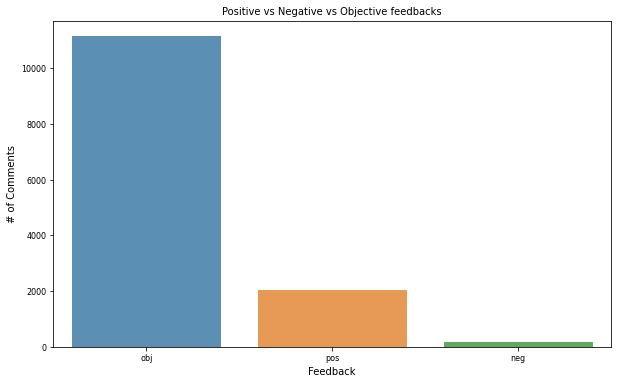

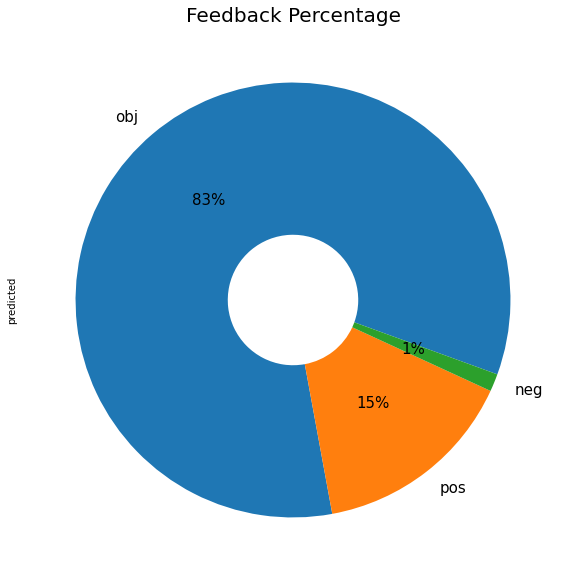

In [ ]:
x_rating = df_test['predicted'].value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Positive vs Negative vs Objective feedbacks", fontsize=10)
plt.ylabel('# of Comments', fontsize=10)
plt.yticks(fontsize=8)
plt.xlabel('Feedback', fontsize=10)
plt.xticks(fontsize=8)
# In[]
plt.figure(figsize=(30,10))
plt.title('Feedback Percentage', fontsize=20)
df_test['predicted'].value_counts().plot(kind='pie', labels=x_rating.index,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})


In [ ]:
df_test.inquiry.value_counts()

1    7395
0    5974
Name: inquiry, dtype: int64

In [ ]:
df_test.query("tags=='price-'").shape[0]

2198

In [ ]:
# df_test.query("inquiry==1 and tags==''").shape
# df_test.where(df_test.query('inquiry == 1') and df_test["tags"].isna())
df_test[df_test.apply(lambda x: x.inquiry==1 and len(str(x.tags).split('-')) > 2 , axis=1)].shape[0]

890

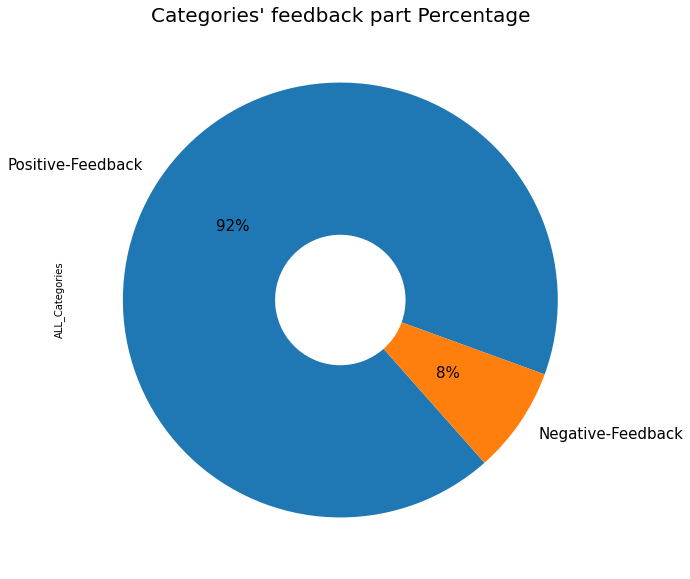

In [ ]:
# feedback = pd.Series({'Positive': df_test.query("predicted=='pos' and inquiry==0").shape[0], 'Negative': df_test.query("predicted=='neg' and inquiry==0").shape[0]})
feedback = df_test.query('ALL_Categories=="Positive-Feedback" or ALL_Categories=="Negative-Feedback"').ALL_Categories.value_counts()
plt.figure(figsize=(30,10))
plt.title('Categories\' feedback part Percentage', fontsize=20)
feedback.plot(kind='pie', labels=feedback.index,
              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
              textprops={'fontsize': 15})


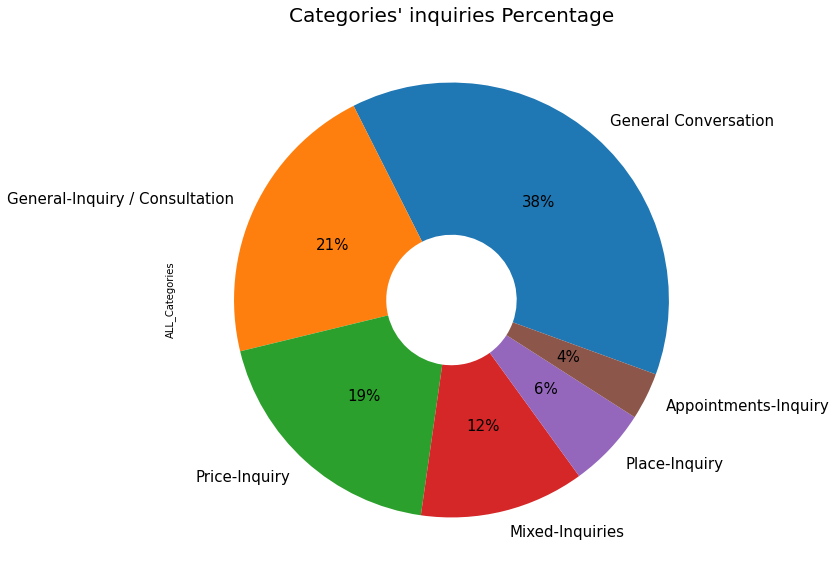

In [ ]:
FB = ["Positive-Feedback", "Negative-Feedback"]
# inquiries = pd.Series({'price_inquiry': df_test.query("tags=='price-'").shape[0], 'place_inquiry': df_test.query("tags=='place-'").shape[0], 'datetime_inquiry': df_test.query("tags=='datetime-'").shape[0], 'mixed_inquiry': df_test[df_test.apply(lambda x: x.inquiry==1 and len(str(x.tags).split('-')) > 2 , axis=1)].shape[0], 'general_inquiry': df_test.query("inquiry==1 and tags==''").shape[0]})
inquiries = df_test.query('ALL_Categories not in @FB').ALL_Categories.value_counts()
plt.figure(figsize=(30,10))
plt.title('Categories\' inquiries Percentage', fontsize=20)
inquiries.plot(kind='pie', labels=inquiries.index,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

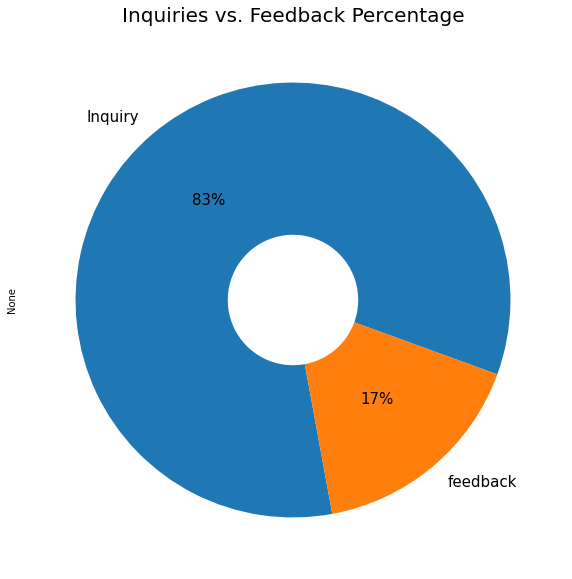

In [ ]:
inq_fb = pd.Series({'Inquiry': df_test.query('ALL_Categories not in @FB').shape[0], 'feedback':  df_test.query('ALL_Categories in @FB').shape[0]})
plt.figure(figsize=(30,10))
plt.title('Inquiries vs. Feedback Percentage', fontsize=20)
inq_fb.plot(kind='pie', labels=inq_fb.index,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

**Full percentage**

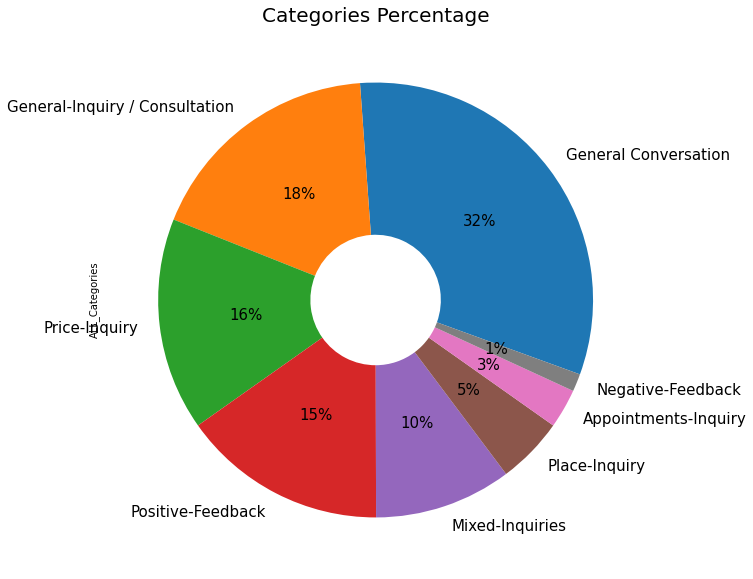

In [ ]:
stats = df_test.ALL_Categories.value_counts()
plt.figure(figsize=(30,10))
plt.title('Categories Percentage', fontsize=20)
stats.plot(kind='pie', labels=stats.index,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})


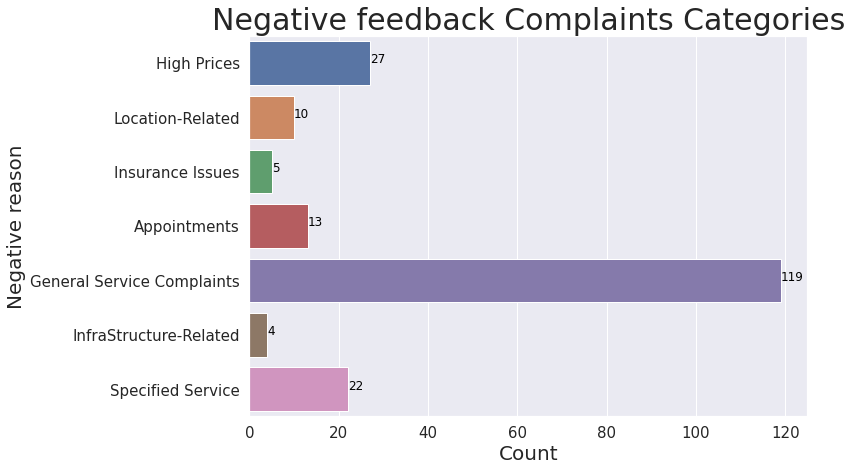

In [ ]:
NEG = df_test.query("predicted=='neg'")
negative_reason = NEG.tags.str.rstrip('-').str.split('-').explode().replace({'': 'General Service Complaints',
                                                                             'price': 'High Prices',
                                                                             'service': 'Specified Service',
                                                                             'datetime': 'Appointments',
                                                                             'place': 'Location-Related',
                                                                             'structure': 'InfraStructure-Related',
                                                                             'insurance': 'Insurance Issues'
                                                                             })

N = negative_reason.value_counts(sort=False)
N = pd.DataFrame({'Negative reason': N.index, 'Count':  N.values})
plt.figure(figsize=(10,7))
# plt.title("Negative feedback Categorization")
sns.set_theme(style="darkgrid")
ax = sns.barplot(y='Negative reason', x='Count', data=N)
ax.axes.set_title("Negative feedback Complaints Categories",fontsize=30)
ax.set_xlabel('Count',fontsize=20)
ax.set_ylabel('Negative reason',fontsize=20)
ax.tick_params(labelsize=15)
for index, row in N.iterrows():
    ax.text(row.Count, row.name, row.Count, color='black', ha="left")
# N.plot(kind='bar', x='Negative reason', y='Count')
# N

## Evaluation function

Loading Word2Vec model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.
Adding dictionaries ...  Done.
Visualizing ...
/content/gdrive/.shortcut-targets-by-id/1TalpU3R9NJvBcFbmrx8aDBjC3JAS8Srl/Andalusia/Sentiment_KSA


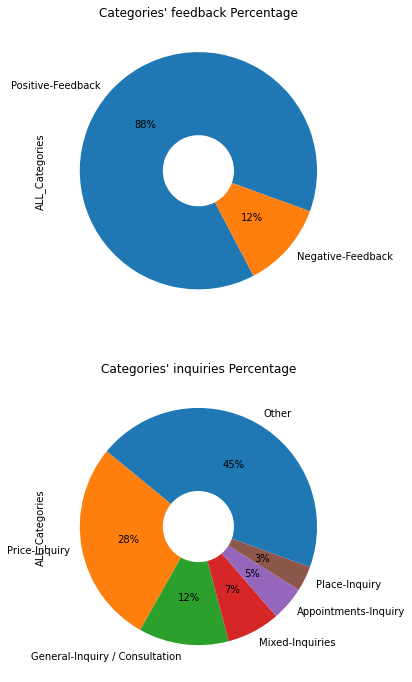

In [ ]:
from utilities import * 
from gensim.models import Word2Vec

class Evaluate(object):
    def __init__(self, data, text_column='message'):
        """Construct the Evaluation class.

        Keyword arguments:
        data -- a Pandas DataFrame containing the data samples to be processed and evaluated (must be of the type -> 'pandas.core.frame.DataFrame')
        text_column -- a string represents the name of the target column that contains the text data  (default 'message')
        """

        if not isinstance(data, pd.core.frame.DataFrame): raise TypeError("data must be a \"pandas dataframe\"")
        if not text_column in data.columns: raise ValueError("You didn't specify the correct column for the text data in the input dataframe")

        self.data = data
        self.message = self.data[text_column].astype(str)
        self.model_parameters = None
        self.predictions = None

    def get_data(self):
        """returns the data DF"""

        return self.data

    def clean(self, input=None, add_to_df=False, pipelined=False):
        """apply text cleaning steps to the message column
        
        Keyword arguments:
        input -- the input series to be processed (default None)
        **Note** - if the value isn't None, it's expected to be used in a pipeline. 
        add_to_df -- a boolean value; if true, it adds the result as a seprate column to the dataframe (default False)
        piplined -- a boolean value; if true, it overwrite self.message with the new transformation for a pipeline (default False) 
        """

        if input is None:
            input = self.message
        cleaned = clean_df(input) # Function defined in utilities.py
        if add_to_df:
            self.data["cleaned"] = cleaned
        if pipelined:
            self.message = cleaned
        return cleaned

    def stem(self, input=None, add_to_df=False, pipelined=False):
        """apply stemming to the message column
        
        Keyword arguments:
        input -- the input series to be processed (default None)
        **Note** - if the value isn't None, it's expected to be used in a pipeline. 
        add_to_df -- a boolean value; if true, it adds the result as a seprate column to the dataframe (default False)
        piplined -- a boolean value; if true, it overwrite self.message with the new transformation for a pipeline (default False) 
        """

        if input is None:
            input = self.message
        stemmed = stem(input) # Function defined in utilities.py, clean text before stemmed
        if add_to_df:
            self.data["stemmed"] = stemmed
        if pipelined:
            self.message = stemmed
        return stemmed

    def lemmatize(self, input=None, add_to_df=False, pipelined=False):
        """apply lemmatization to the message column
        
        Keyword arguments:
        input -- the input series to be processed (default None)
        **Note** - if the value isn't None, it's expected to be used in a pipeline. 
        add_to_df -- a boolean value; if true, it adds the result as a seprate column to the dataframe (default False)
        piplined -- a boolean value; if true, it overwrite self.message with the new transformation for a pipeline (default False) 
        """
        #TODO: takes too much time 
        if input is None:
            input = self.message
        lemmatized = lemma(input) # Function defined in utilities.py, clean text before lemmatization
        if add_to_df:
            self.data["lemmatized"] = lemmatized
        if pipelined:
            self.message = lemmatized
        return lemmatized

    def remove_stopwords(self, input=None, add_to_df=False, pipelined=False, stopWords=None, split=False, progress_per=None):
        """remove stopwords from the message column
        
        Keyword arguments:
        input -- the input series to be processed (default None)
        **Note** - if the value isn't None, it's expected to be used in a pipeline. 
        add_to_df -- a boolean value; if true, it adds the result as a seprate column to the dataframe (default False)
        piplined -- a boolean value; if true, it overwrite self.message with the new transformation for a pipeline (default False) 
        """

        if input is None:
            input = self.message
        no_sw = remove_stopwords(input, stopWords, split, progress_per) # Function defined in utilities.py
        if add_to_df:
            self.data["without_stopwords"] = no_sw
        if pipelined:
            self.message = no_sw
        return no_sw

    def transform(self, vectorizer="w2v", vect_model=None):
        """vector transform message column for classification

        Keyword arguments:
        vectorizer -- a string value describes the vectorization method used for preparing the data. 
        it can only take either 'tfidf' -> tfidf vectorization, or 'w2v' -> word2vec vectorization (default 'w2v')
        vect_model -- optionally, an object of the vectorizing model can be given here to save loading time, it must be the same type specified in 'vectorized' (default None)
        """

        if vectorizer=='tfidf':

            # Loading vectorizing model
            print("Loading Tf-Idf model ...")
            if vect_model is None:
                with open(os.path.join('./models', 'tfidf_features.pkl'), 'rb') as fid:
                    vocabulary = pickle.load(fid)
                    idfs = pickle.load(fid)
                tfidf = TfidfVectorizer(tokenizer=tokenizer, lowercase= False, ngram_range=(1,2), max_features=5000, vocabulary=vocabulary )#, max_df=0.7, min_df=5)#, preprocessor=sents, stop_words=cachedStopWords)
                tfidf.idf_=idfs
            else:
                tfidf = vect_model

            # Transformation
            print("Transforming data ...", end=' ')
            X = self.stem()
            self.remove_stopwords(X)
            X = tfidf.transform(X)

        elif vectorizer=='w2v':

            # Loading vectorizing model
            print("Loading Word2Vec model ...")
            if vect_model is None:
                w2v_model = Word2Vec.load('./models/w2v_checkpoints/w2v_model_epoch15.gz')
                wtv_vect = WordVecVectorizer(w2v_model) # Class defined in utilities.py
            else:
                wtv_vect = vect_model

            # Transformation
            print("Transforming data ...", end=' ')
            X = self.clean()
            X = wtv_vect.transform(X)

        else:
            raise ValueError("vectorizer should only be either 'tfidf' or 'w2v', however you entered {}".format(vectorizer))
        print("Done.")

        return X

    def predict(self, input=None, model_name='FCNN_model'):
        """Evaluate the FCNN model and produce predictions

        Keyword arguments:
        input -- a numpy array represent the transformed data; it should be the output of self.transform in the shape (# of samples, features_dim) (default None). 
        model_name -- the name of the folder, which contains the model, the full path would be './models/model_name' (default 'FCNN_model)
        """

        # in case the input is not given
        if input is None:
            input = self.transform("w2v")
        # Loading the classification model
        print("Loading Classification model ... ")
        model, parameters = load_keras_model(model_name) # Function defined in utilities.py
        # Defining parameters
        self.model_parameters = parameters
        dense_layers, opt_name, batch_size, lr, decay, int_category = self.model_parameters['param']
        cats = len(int_category)
        input_shape = (input.shape[1], )
        if opt_name=='Adamax':
            opt = Adamax(lr=lr, decay=decay)
        else:
            opt = Adam(lr=lr, decay=decay)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        # Evaluating the model
        print("Evaluating the model ...", end=' ')
        predictions = model.predict(input).argmax(axis=1)
        predictions = list(map(lambda x: int_category[x], predictions))
        self.data['predicted'] = predictions
        self.predictions = predictions
        print("Done.")

        return predictions

    def add_dicts(self):
        """Categorize topics for the text data with respect to a dictionary"""

        # a pre-requisit
        if "predicted" not in self.data.columns:
            self.predict(model_name='FCNN_model')

        print("Adding dictionaries ... ", end=' ')
        
        self.data["tags"] = ""
        self.data["inquiry"] = 0
        self.data["ALL_Categories"] = ''

        stemmed = self.stem()
        # lemmed = self.lemmatize() #TODO: takes too much time 

        for idx in self.data.index:

            # Adding "tags" and "inquiry" columns
            sentence = stemmed.loc[idx].split() #+ lemmed.loc[idx].split() # TODO
            if any(e in sentence for e in ['ŸÉÿßŸÖ' ,'ŸÉŸÖ', 'ÿ®ŸÉŸÖ', 'ŸÉŸÑŸÅ', 'ÿ≥ÿπÿ±']): self.data.at[idx, 'tags'] += 'price-'; self.data.at[idx, 'inquiry'] = 1
            if any(e in sentence for e in ['ŸÖŸàÿßÿπŸäÿØ', 'ŸäÿπÿØ', 'ÿπÿßÿØ']): self.data.at[idx, 'tags'] += 'datetime-'; self.data.at[idx, 'inquiry'] = 1
            if any(e in sentence for e in ['ÿπŸÜŸà', 'ÿπŸÜŸàÿßŸÜ', 'ÿßÿ±Ÿàÿ≠', 'ŸÖŸÉÿßŸÜ', 'ŸÅÿ±ÿπ', 'ŸàŸÅŸâ']): self.data.at[idx, 'tags'] += 'place-'; self.data.at[idx, 'inquiry'] = 1
            if any(e in sentence for e in ['ÿ±ÿ¨ÿßÿ°', 'ŸÖÿ≠ÿ™ÿßÿ¨', 'ÿπÿßŸàÿ≤', 'ÿ™ŸÅÿßÿµŸäŸÑ', 'ÿßÿ±ÿ¨Ÿà', 'ÿπÿ±ŸÅ', 'ŸáŸÑ', 'ÿßŸäŸá', 'ÿßÿ≤ÿßŸä', 'ŸÖÿπŸÑÿ¥', 'ÿ≥ŸÖÿ≠', 'ŸÖÿßŸÜ', 'Ÿäÿßÿ±Ÿäÿ™', 'ŸÖŸÖŸÉŸÜ', 'ŸÑŸäŸá']): self.data.at[idx, 'inquiry'] = 1 # general
            
            # Adding "ALL_Categories" column
            if self.data.at[idx, 'inquiry']==0:
                self.data.at[idx, 'ALL_Categories'] = 'Positive-Feedback' if self.data.predicted[idx]=='pos' else 'Negative-Feedback' if self.data.predicted[idx]=='neg' else 'Other'
            else:
                if self.data.at[idx, 'tags']=='price-': self.data.at[idx, 'ALL_Categories'] = 'Price-Inquiry'
                elif self.data.at[idx, 'tags']=='place-': self.data.at[idx, 'ALL_Categories'] = 'Place-Inquiry'
                elif self.data.at[idx, 'tags']=='datetime-': self.data.at[idx, 'ALL_Categories'] = 'Appointments-Inquiry'
                elif self.data.at[idx, 'tags']=='' : self.data.at[idx, 'ALL_Categories'] = 'General-Inquiry / Consultation' #np.isnan(self.data.at[idx, 'tags'])
                else: self.data.at[idx, 'ALL_Categories'] = 'Mixed-Inquiries'
        
        print("Done.")

    def visualize(self):
        """Visualizing the final data; making tow pie plots for feedback data, inquiry data"""
        
        # a pre-requisit
        if "ALL_Categories" not in self.data.columns:
            self.add_dicts()
        
        print("Visualizing ...")
        feedback = self.data.query('ALL_Categories=="Positive-Feedback" or ALL_Categories=="Negative-Feedback"').ALL_Categories.value_counts()
        # plt.figure(figsize=(15,10))
        fig, ax = plt.subplots(2, figsize=(20, 12))
        ax[0].set_title('Categories\' feedback Percentage', fontsize=12)
        feedback.plot(kind='pie', labels=feedback.index,
                    wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                    textprops={'fontsize': 10}, ax=ax[0])
        
        inquiries = self.data.query('inquiry==1 or predicted=="obj"').ALL_Categories.value_counts()
        # plt.figure(figsize=(15,10))
        ax[1].set_title('Categories\' inquiries Percentage', fontsize=12)
        inquiries.plot(kind='pie', labels=inquiries.index,
                                    wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                                    textprops={'fontsize': 10}, ax=ax[1])


if __name__ == '__main__':
    os.chdir("../Evaluation/")
    df = pd.read_csv("./data/data.csv")
    
    eval = Evaluate(df)
    transformed = eval.transform(vectorizer="w2v")
    predictiones = eval.predict(input=transformed, model_name='FCNN_w2v_model')
    eval.add_dicts()
    eval.visualize()
    Final_data = eval.get_data()
    os.chdir(curDir)
    !pwd


In [ ]:
eval.get_data().sample(5, random_state=10)

Unnamed: 0  Unnamed: 0.1  ... inquiry   ALL_Categories
1462        1462          1664  ...       1  Mixed-Inquiries
2783        2783          3145  ...       1    Place-Inquiry
3231        3231          3669  ...       0            Other
1198        1198          1340  ...       0            Other
372          372           415  ...       1    Price-Inquiry

[5 rows x 7 columns]

In [ ]:
transformed.shape

(13752, 300)

In [ ]:
!ls -alh models/FCNN_w2v_model

total 583K
-rw------- 1 root root 2.3K Feb 14 15:41 FCNN_w2v_model_architecture.json
-rw------- 1 root root  299 Feb 14 15:41 FCNN_w2v_model_parameters.pkl
-rw------- 1 root root 580K Feb 14 15:41 FCNN_w2v_model_weights.hdf5


In [ ]:
# !pip freeze 
! pip install pipreqs
! pipreqs ../Evaluation/
# !ls
!cat ../Evaluation/requirements.txt

INFO: Successfully saved requirements file in ../Evaluation/requirements.txt
pandas==1.1.5
seaborn==0.11.1
Keras==2.4.3
gensim==3.6.0
nltk==3.2.5
numpy==1.19.5
matplotlib==3.2.2
pyarabic==0.6.10
scikit_learn==0.24.1
tashaphyne==0.3.4.1


In [ ]:
!cp ../Sentiment_task/models/tfidf_features.pkl ../Evaluation/models/

In [ ]:
!ls -lah ../Evaluation/models/

total 299K
drwx------ 2 root root 4.0K Feb 15 09:05 best_acc_FCNN
drwx------ 2 root root 4.0K Feb 15 09:05 best_score_FCNN
drwx------ 2 root root 4.0K Feb 15 12:25 FCNN_tfidf_model
drwx------ 2 root root 4.0K Feb 15 09:03 FCNN_w2v_model
-rw------- 1 root root 279K Feb 15 13:20 tfidf_features.pkl
drwx------ 2 root root 4.0K Feb 15 09:15 w2v_checkpoints


In [ ]:
# ! mkdir ../Evaluation/data
! ls -lah ../Evaluation/models/w2v_checkpoints/

ls: cannot access '../Evaluate/models/w2v_checkpoints/': No such file or directory


In [ ]:
pd.read_csv("../Sentiment_task/data/arabic_colab.csv").drop(columns=["langs","msg_stem","msg_stem_stop_words", "msg_lemmed"]).to_csv("../Evaluation/data/data.csv")

Loading Word2Vec model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.
Adding dictionaries ...  Done.
Visualizing ...
      Unnamed: 0  Unnamed: 0.1  ... inquiry   ALL_Categories
1462        1462          1664  ...       1  Mixed-Inquiries
2783        2783          3145  ...       1    Place-Inquiry
3231        3231          3669  ...       0            Other
1198        1198          1340  ...       0            Other
372          372           415  ...       1    Price-Inquiry

[5 rows x 7 columns]
/content/gdrive/.shortcut-targets-by-id/1TalpU3R9NJvBcFbmrx8aDBjC3JAS8Srl/Andalusia/Sentiment_KSA


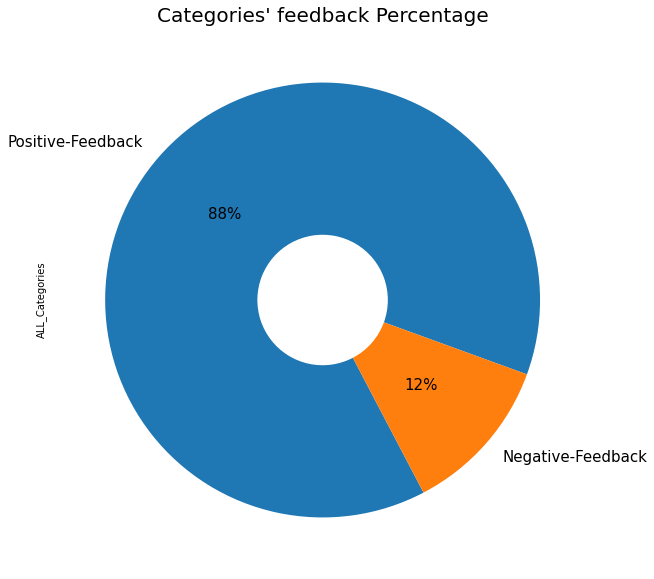

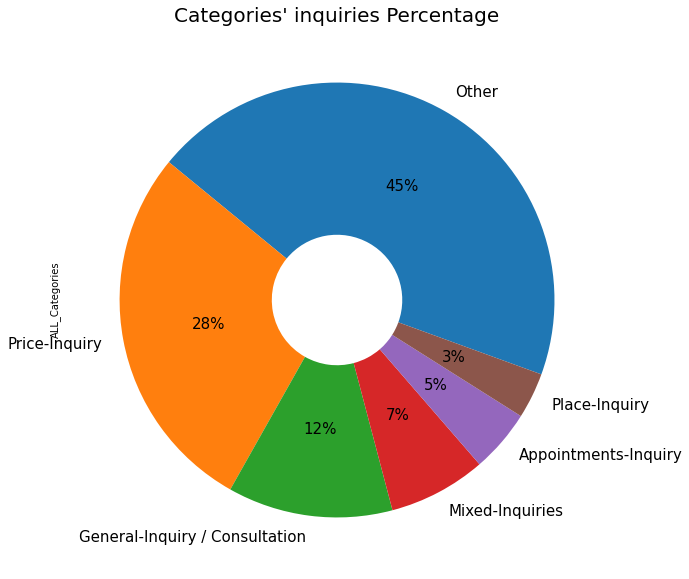

In [ ]:
os.chdir("../Evaluation/")
# ! python Evcaluate.py
from Evaluation_function import Evaluate
import pandas as pd

df = pd.read_csv("./data/data.csv")

eval = Evaluate(df)
transformed = eval.transform(vectorizer="w2v")
predictiones = eval.predict(input=transformed, model_name='FCNN_w2v_model')
eval.add_dicts()
eval.visualize()
Final_data = eval.get_data()
print(Final_data.sample(5, random_state=10))

os.chdir(curDir)
!pwd

In [ ]:
Final_data.sample(5, random_state=10)

Unnamed: 0  Unnamed: 0.1  ... inquiry   ALL_Categories
1462        1462          1664  ...       1  Mixed-Inquiries
2783        2783          3145  ...       1    Place-Inquiry
3231        3231          3669  ...       0            Other
1198        1198          1340  ...       0            Other
372          372           415  ...       1    Price-Inquiry

[5 rows x 7 columns]